In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
immo_AP_H = pd.read_csv('../data/raw/immo_house_apartment_not_null.csv')
# immo_raw_df = pd.read_csv('../data/raw/rawdata.csv')
immo_AP_H.head()

Price  Facades  Habitable Surface       Type  Bedroom Count  \
0  220000      3.0              115.0  APARTMENT            3.0   
1  339000      3.0              134.0  APARTMENT            3.0   
2  495000      2.0              134.0  APARTMENT            2.0   
3  175000      2.0               90.0  APARTMENT            2.0   
4  289000      2.0               80.0  APARTMENT            3.0   

   Bathroom Count  Toilet Count  Room Count  Kitchen Type  Furnished  Terrace  \
0             1.0           2.0         6.0           1.0          0        1   
1             1.0           2.0         6.0           1.0          0        1   
2             1.0           2.0         5.0           1.0          0        1   
3             1.0           1.0         4.0           1.0          0        1   
4             1.0           1.0         5.0           1.0          0        1   

   Terrace Surface  State of Building  Living Surface  EPC  \
0        16.322259                3.0            34.0  4.0   
1        19.144320                3.0            30.0  5.0   
2        12.000000                3.0            40.0  3.0   
3         7.000000                3.0            37.0  5.0   
4         2.000000                3.0            30.0  0.0   

   Consumption Per m2 Municipality         Province  APARTMENT  HOUSE  
0               187.0      WAREMME             LUIK          1      0  
1               113.0     WETTEREN  OOST-VLAANDEREN          1      0  
2               202.0       ELSENE          BRUSSEL          1      0  
3               124.0    ANTWERPEN        ANTWERPEN          1      0  
4               383.0        JETTE          BRUSSEL          1      0

In [62]:
immo_AP_H.columns

Index(['Price', 'Facades', 'Habitable Surface', 'Type', 'Bedroom Count',
       'Bathroom Count', 'Toilet Count', 'Room Count', 'Kitchen Type',
       'Furnished', 'Terrace', 'Terrace Surface', 'State of Building',
       'Living Surface', 'EPC', 'Consumption Per m2', 'Municipality',
       'Province', 'APARTMENT', 'HOUSE'],
      dtype='object')

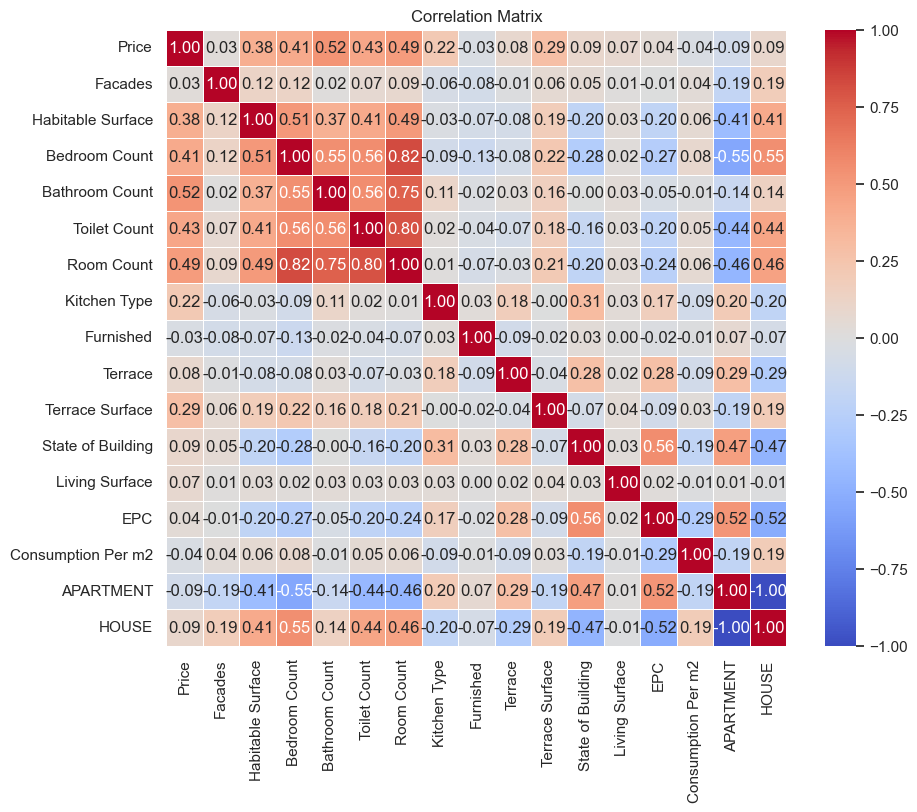

In [39]:
correlation_matrix = immo_AP_H[immo_AP_H.select_dtypes(include=['int', 'float']).columns].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [40]:
immo_AP = immo_AP_H[immo_AP_H['Type'] == 'APARTMENT']
immo_H = immo_AP_H[immo_AP_H['Type'] == 'HOUSE']

In [41]:
immo_AP.shape

(7575, 20)

In [42]:
immo_H.shape

(3468, 20)

In [43]:
immo_H.Province.unique()

array(['OOST-VLAANDEREN', 'LUXEMBURG', 'WAALS-BRABANT', 'LIMBURG', 'LUIK',
       'VLAAMS-BRABANT', 'ANTWERPEN', 'BRUSSEL', 'NAMEN',
       'WEST-VLAANDEREN', 'HENEGOUWEN'], dtype=object)

<Figure size 10000x10000 with 0 Axes>

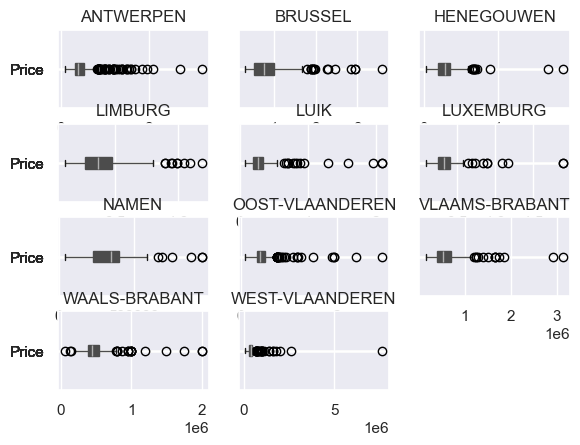

In [44]:
region_group = immo_H.groupby('Province')

plt.figure(figsize=(100, 100)) 
region_group.boxplot(column='Price', vert=False, patch_artist=True)
plt.xlabel('Price')
plt.ylabel('Province')
plt.title("Boxplot - House's Price per Province")
plt.show()


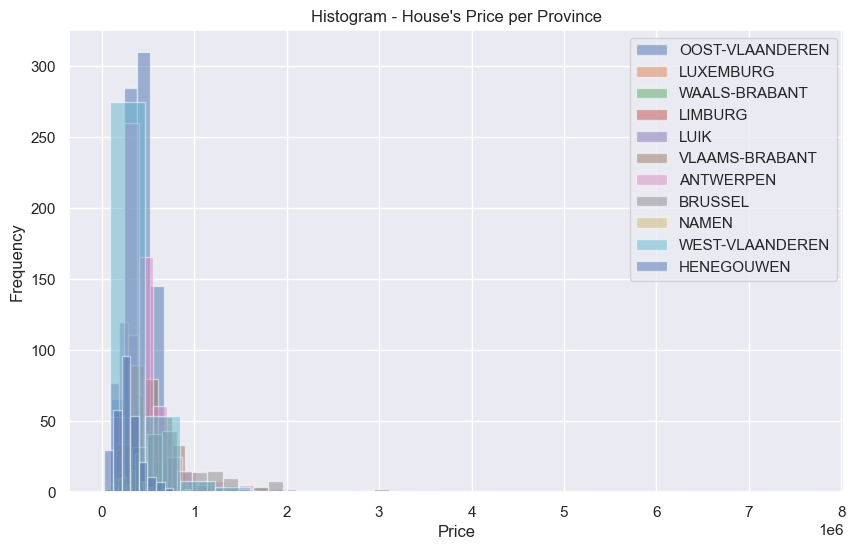

In [45]:
unique_regions = immo_H['Province'].unique()

plt.figure(figsize=(10, 6))  
for region in unique_regions:
    region_price = immo_H[immo_H['Province'] == region]['Price']
    plt.hist(region_price, bins=20, alpha=0.5, label=region)

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title("Histogram - House's Price per Province")
plt.legend()
plt.show()

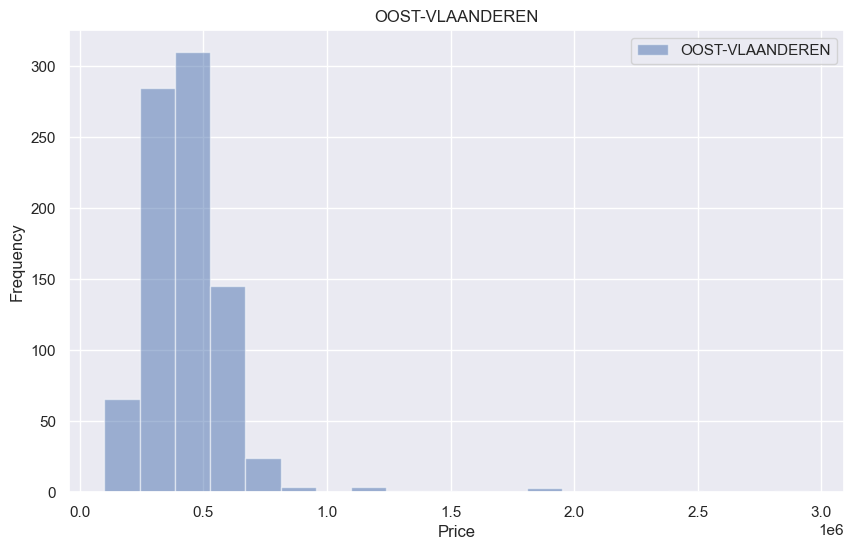

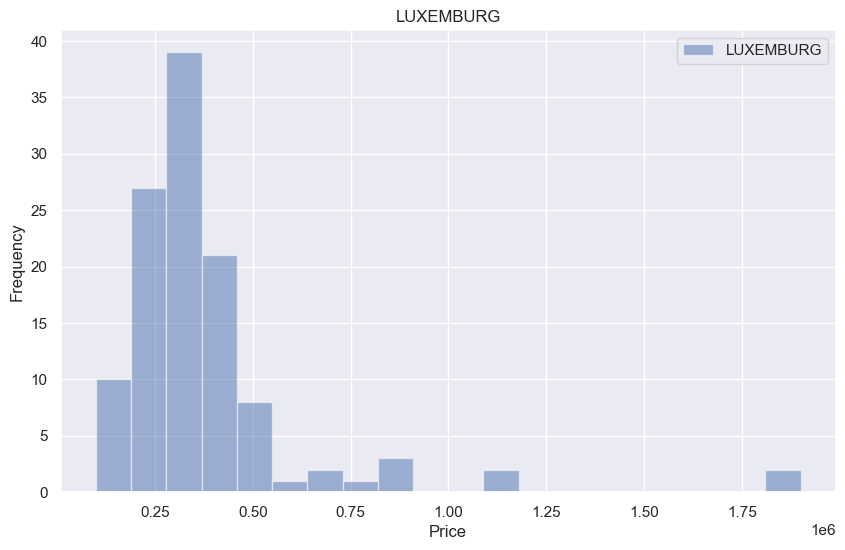

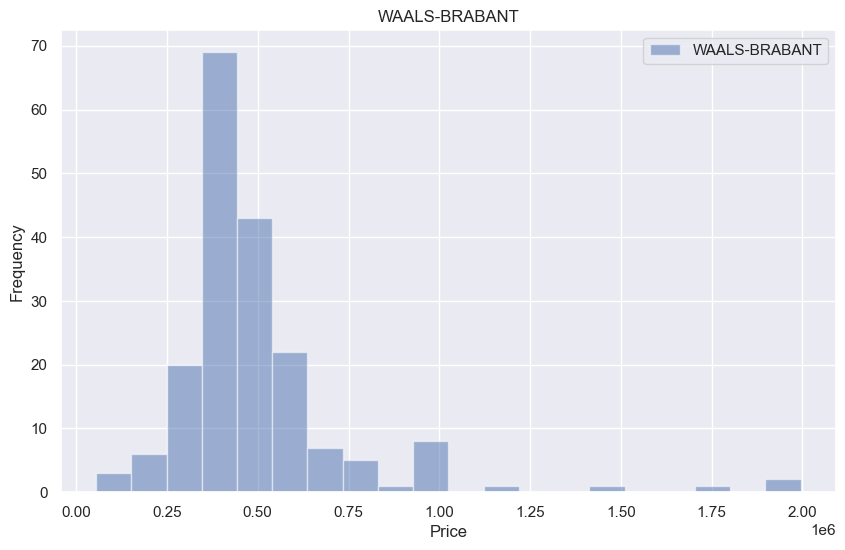

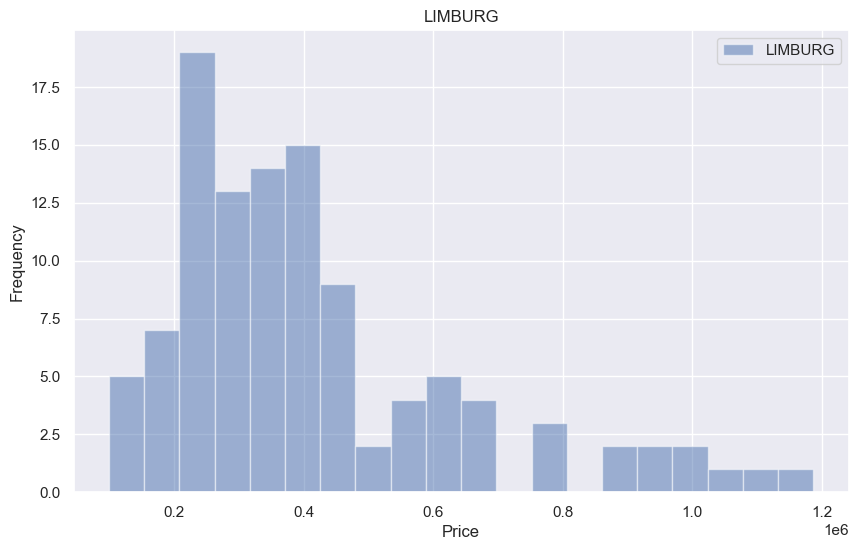

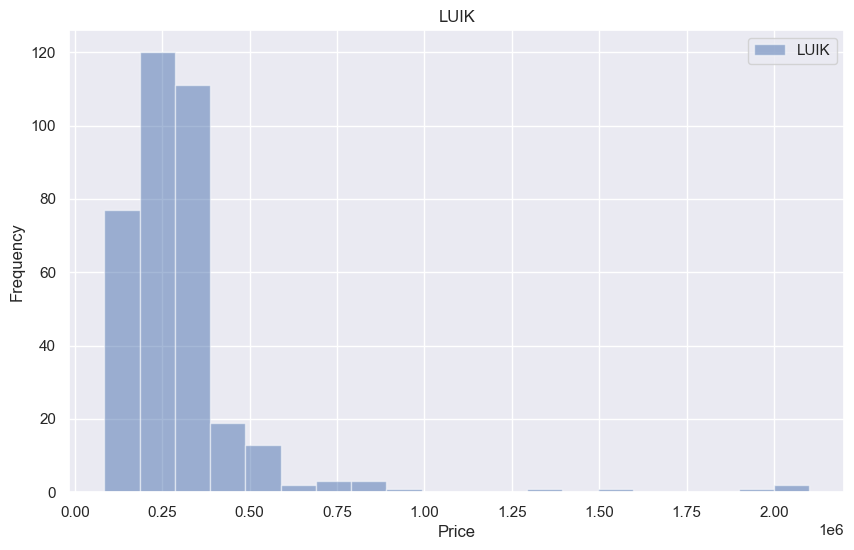

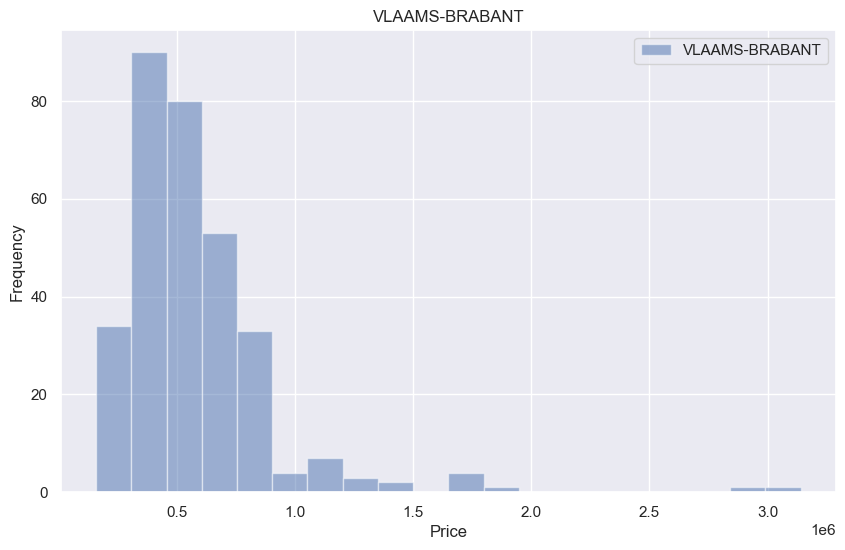

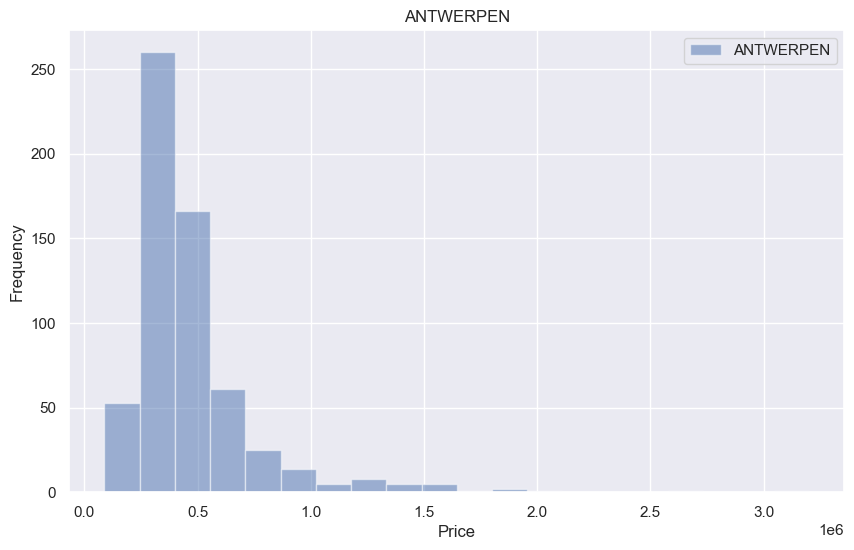

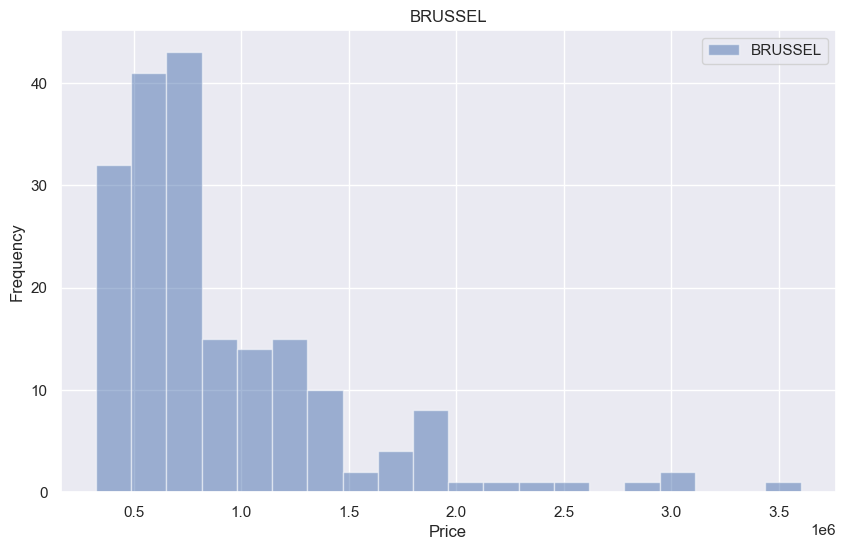

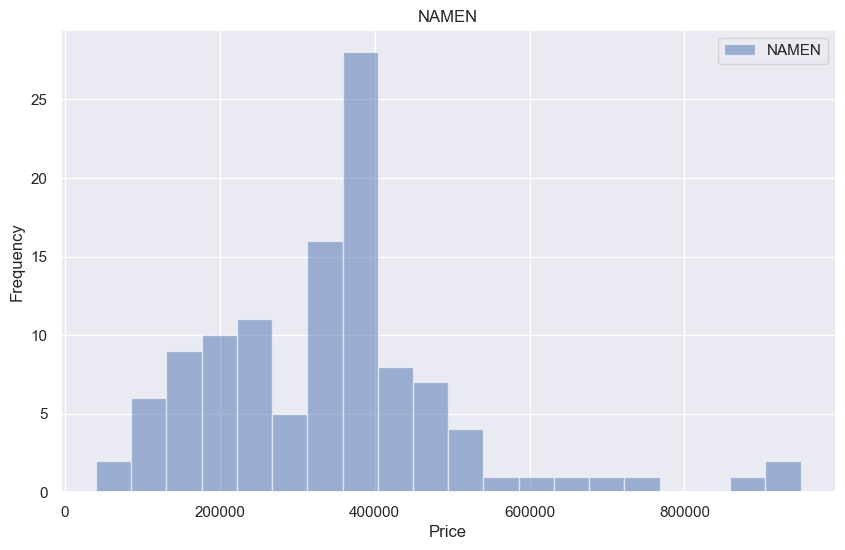

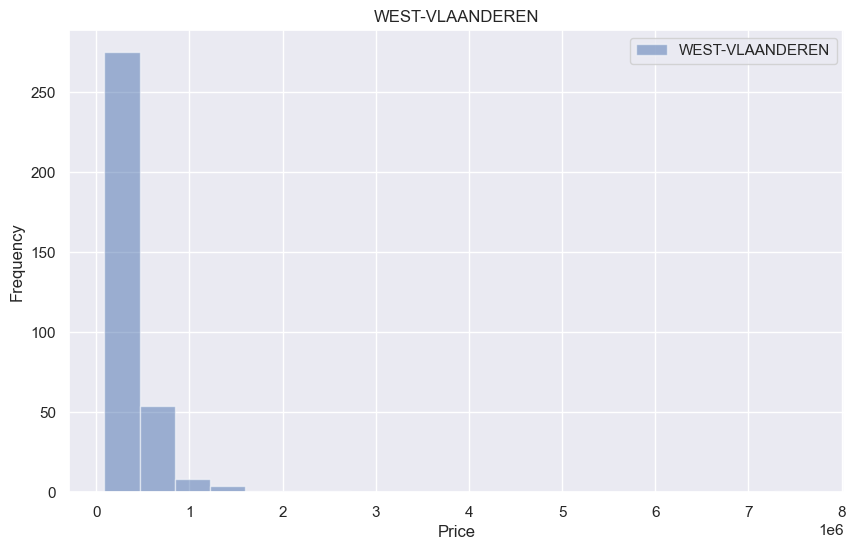

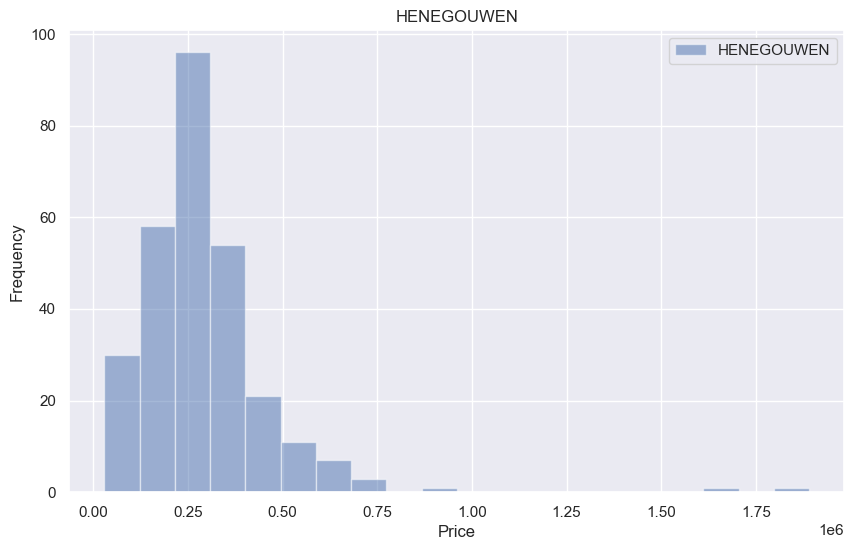

In [46]:
for prov in immo_H['Province'].unique():
    plt.figure(figsize=(10, 6))  
    
    region_price = immo_H[immo_H['Province'] == prov]['Price']
    plt.hist(region_price, bins=20, alpha=0.5, label=prov)
    
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.title(prov)
    plt.legend()
    plt.show()

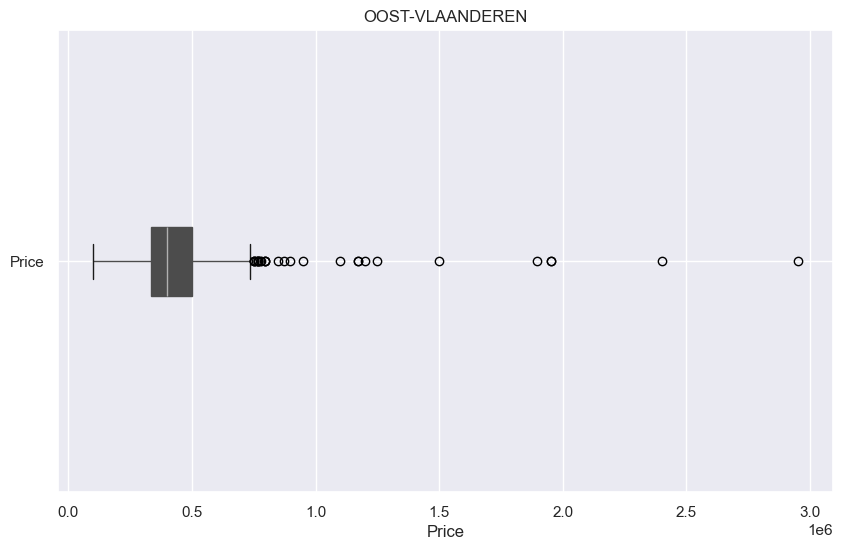

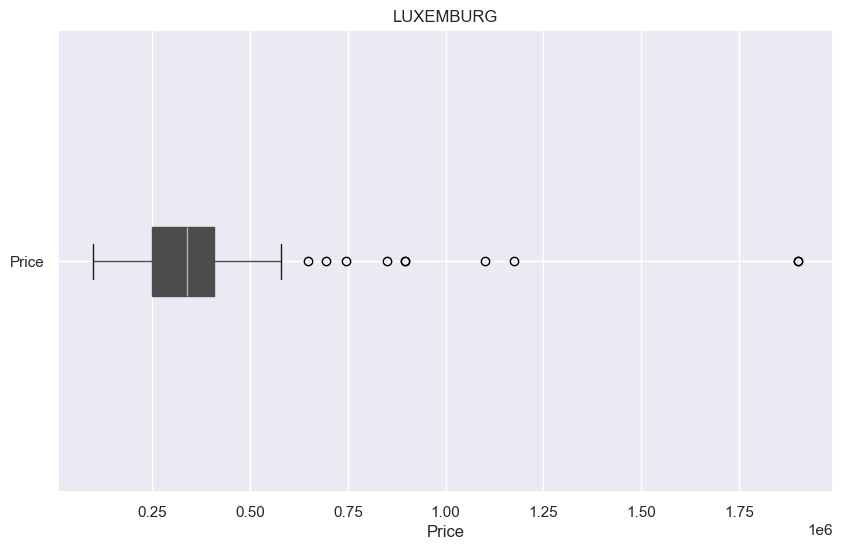

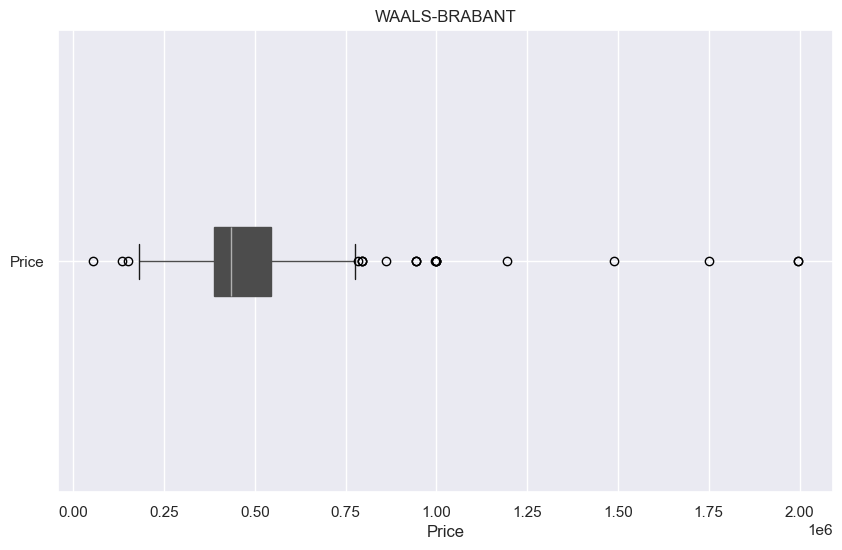

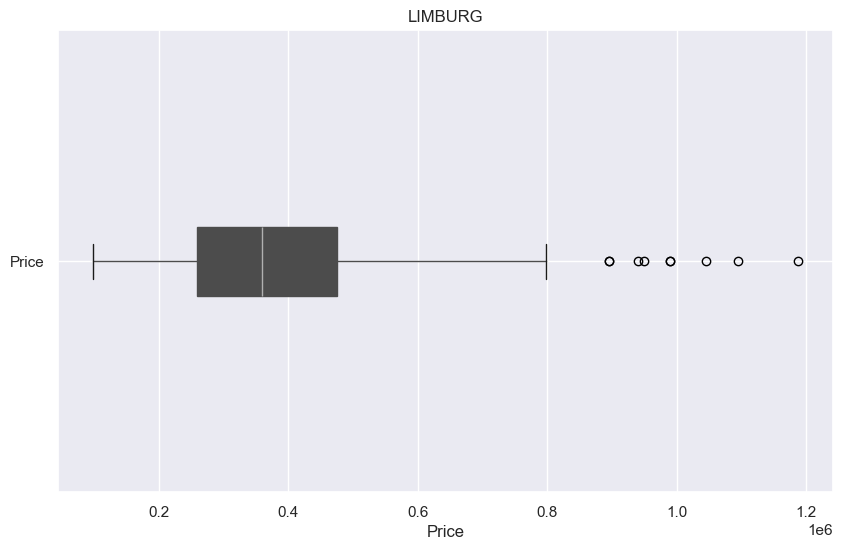

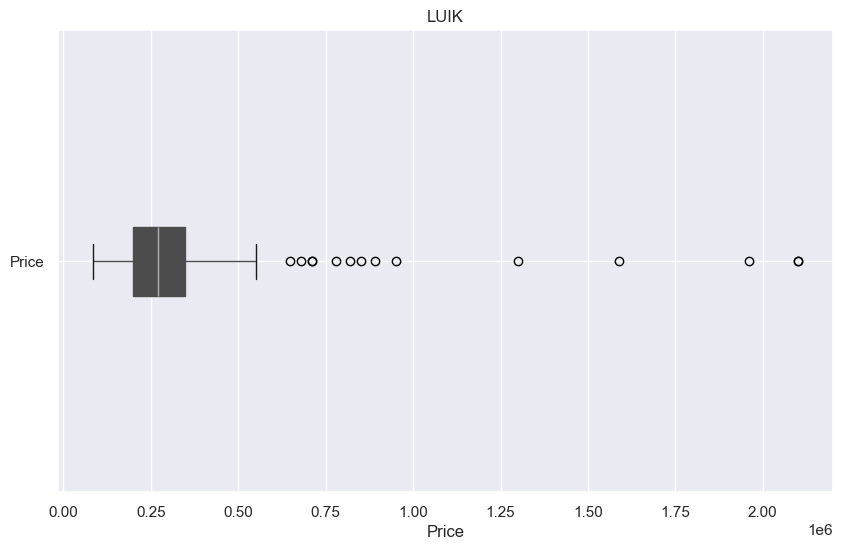

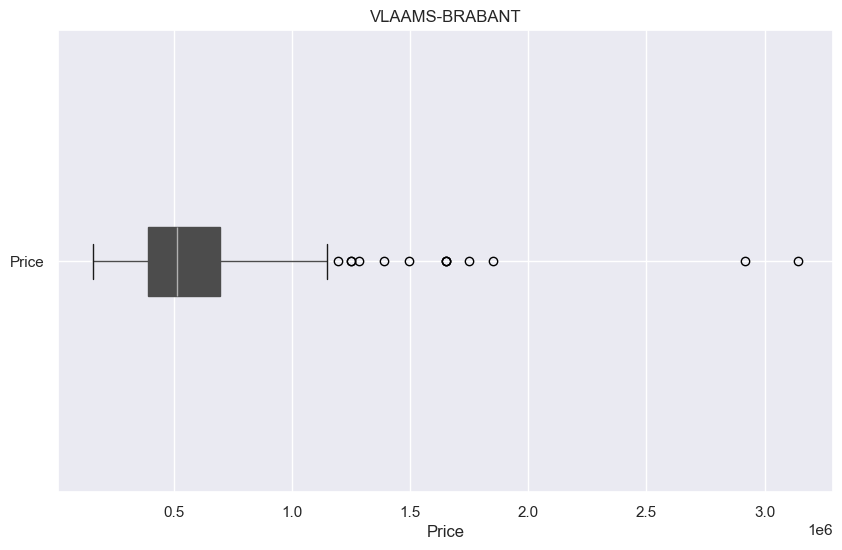

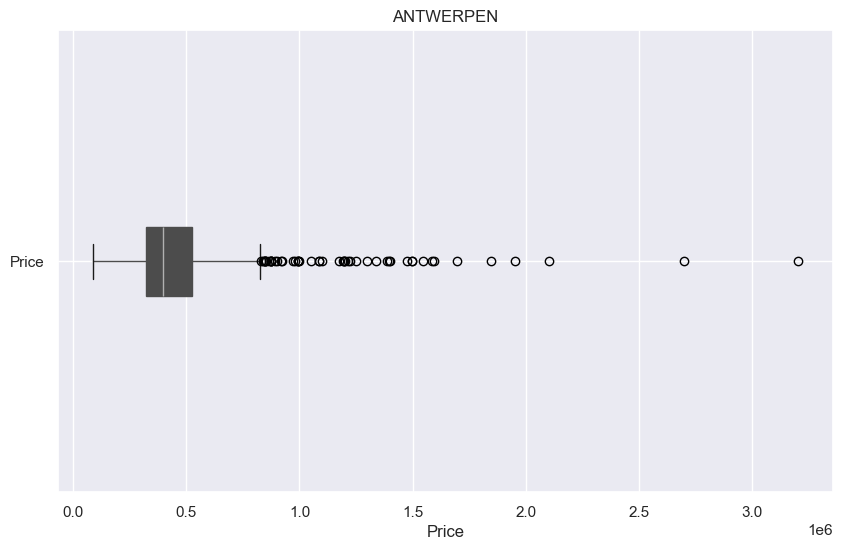

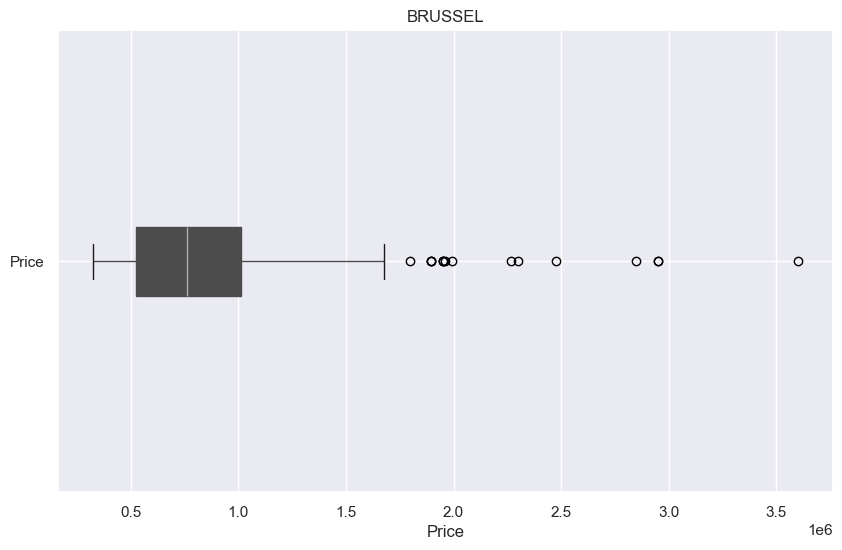

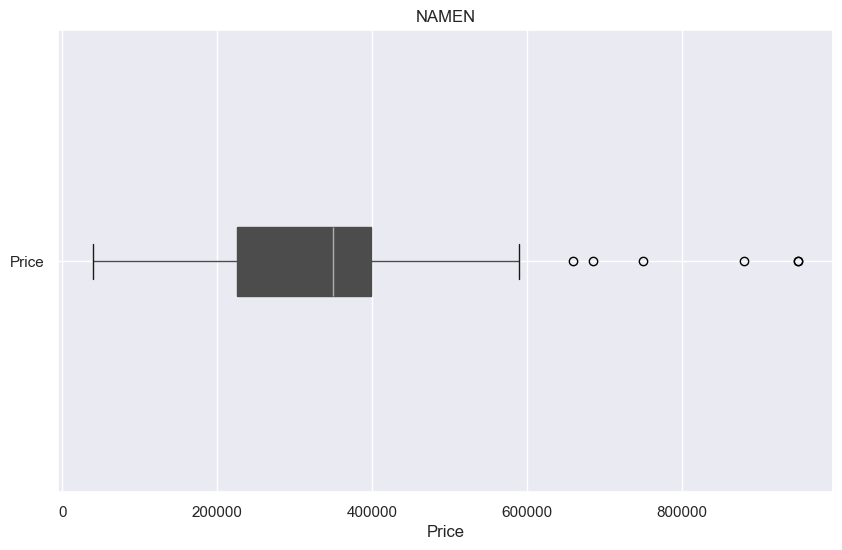

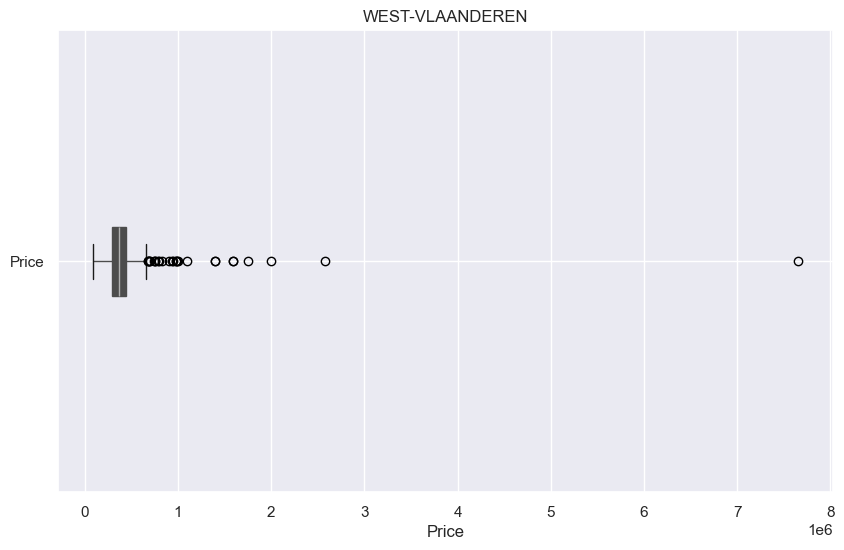

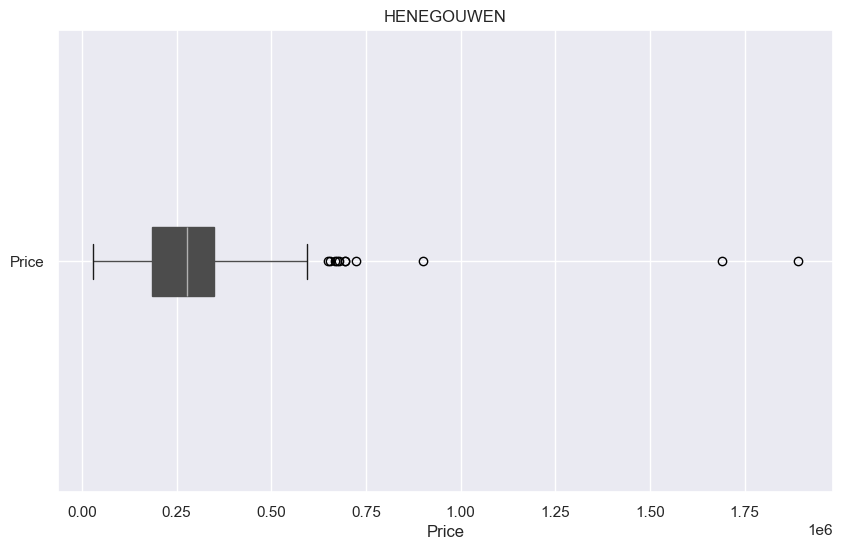

In [47]:
for prov in immo_H.Province.unique():
    plt.figure(figsize=(10, 6)) 
    immo_H[immo_H['Province'] == prov].boxplot(column='Price', vert=False, patch_artist=True)
    plt.xlabel('Price')
    
    plt.title(prov)
    plt.show()

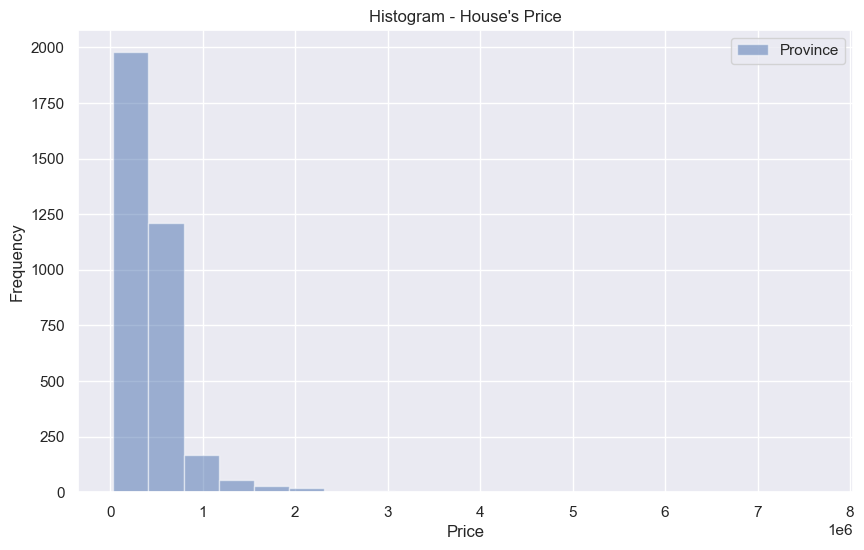

In [48]:
unique_regions = immo_H['Province'].unique()

plt.figure(figsize=(10, 6))  


plt.hist(immo_H['Price'], bins=20, alpha=0.5, label='Province')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title("Histogram - House's Price")
plt.legend()
plt.show()

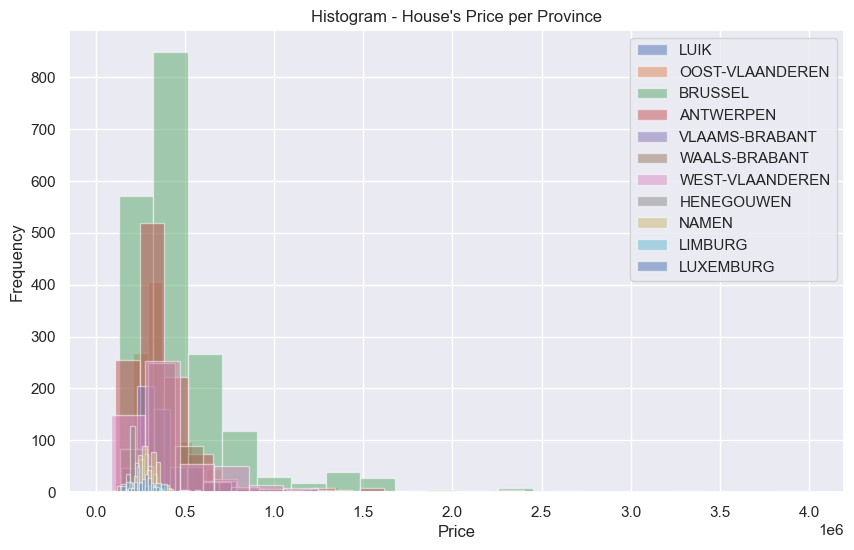

In [49]:
unique_regions = immo_AP['Province'].unique()

plt.figure(figsize=(10, 6))  
for region in unique_regions:
    region_price = immo_AP[immo_AP['Province'] == region]['Price']
    plt.hist(region_price, bins=20, alpha=0.5, label=region)

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title("Histogram - House's Price per Province")
plt.legend()
plt.show()

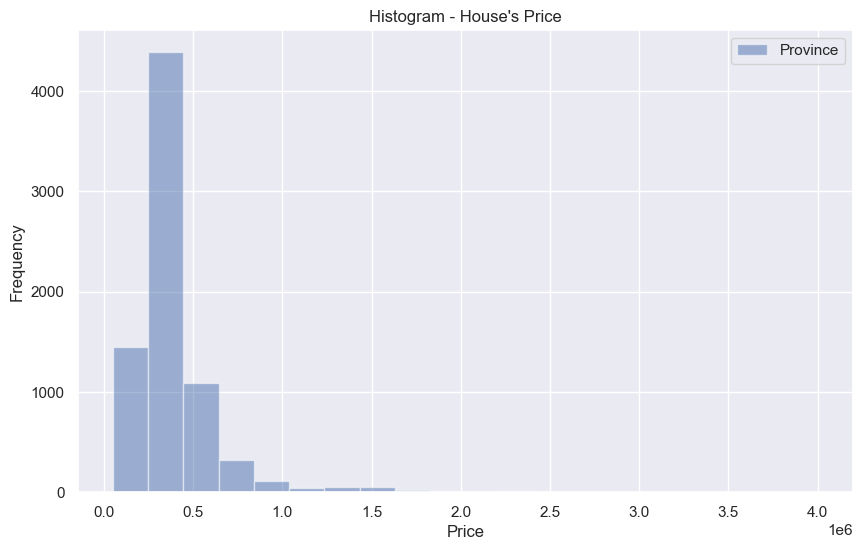

In [50]:
unique_regions = immo_AP['Province'].unique()

plt.figure(figsize=(10, 6))  


plt.hist(immo_AP['Price'], bins=20, alpha=0.5, label='Province')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title("Histogram - House's Price")
plt.legend()
plt.show()

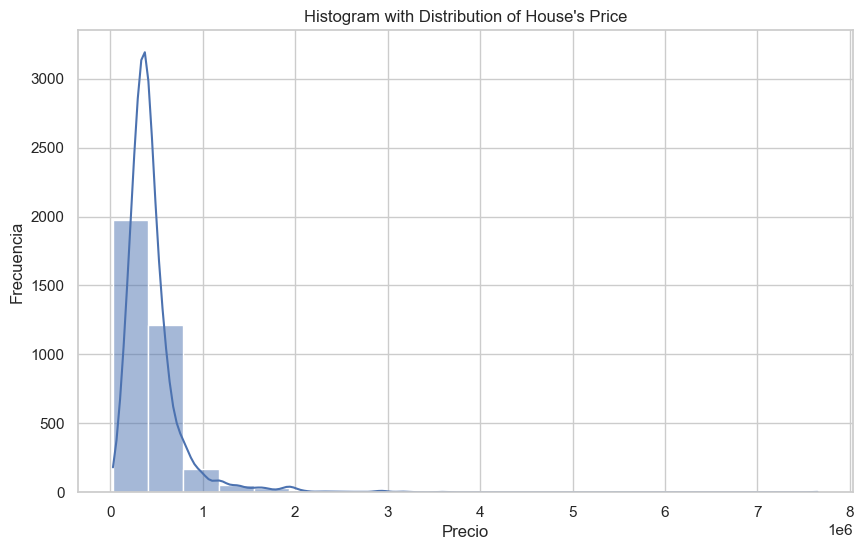

In [51]:
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.histplot(immo_H['Price'], bins=20, kde=True)

plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title("Histogram with Distribution of House's Price")

plt.show()

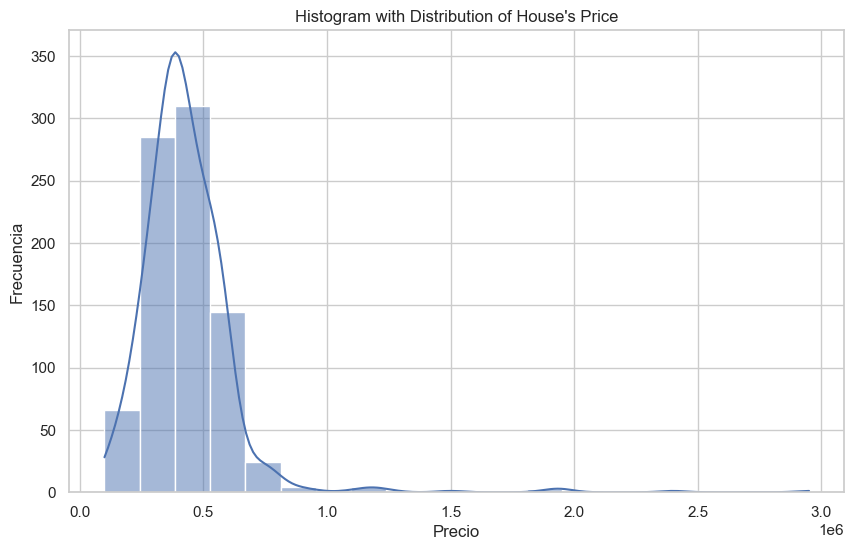

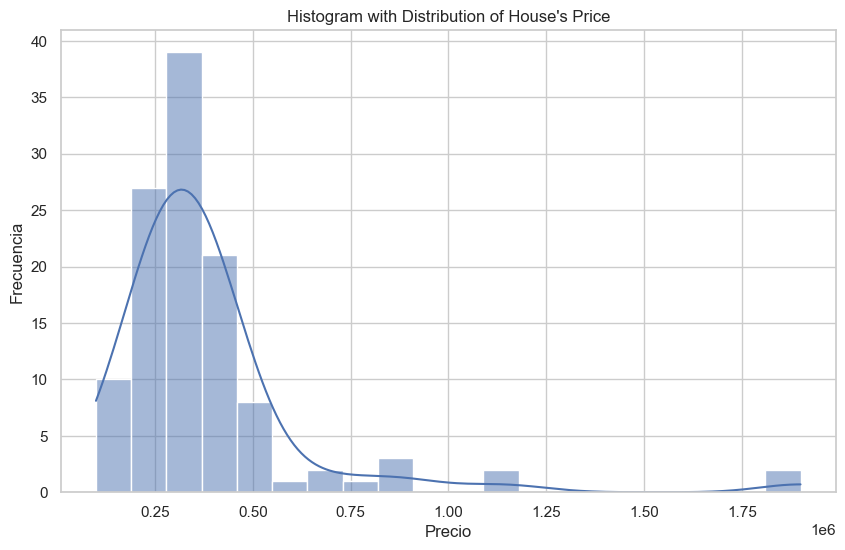

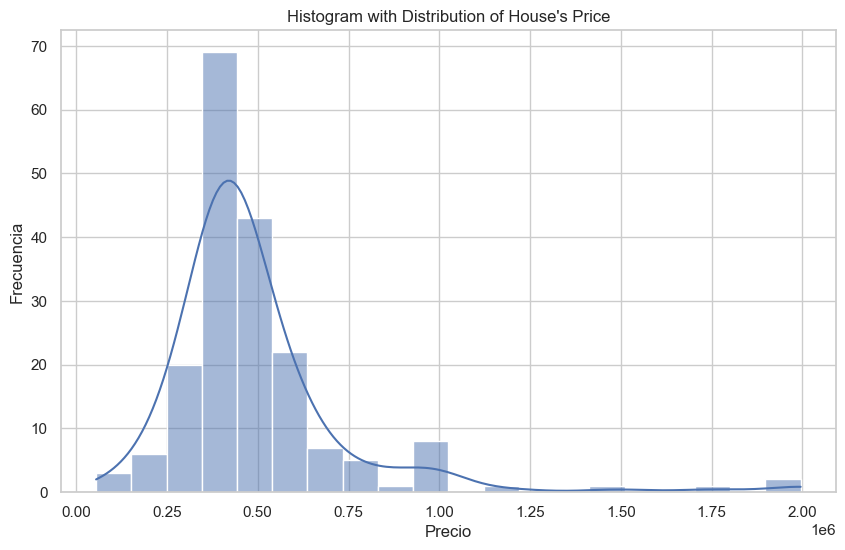

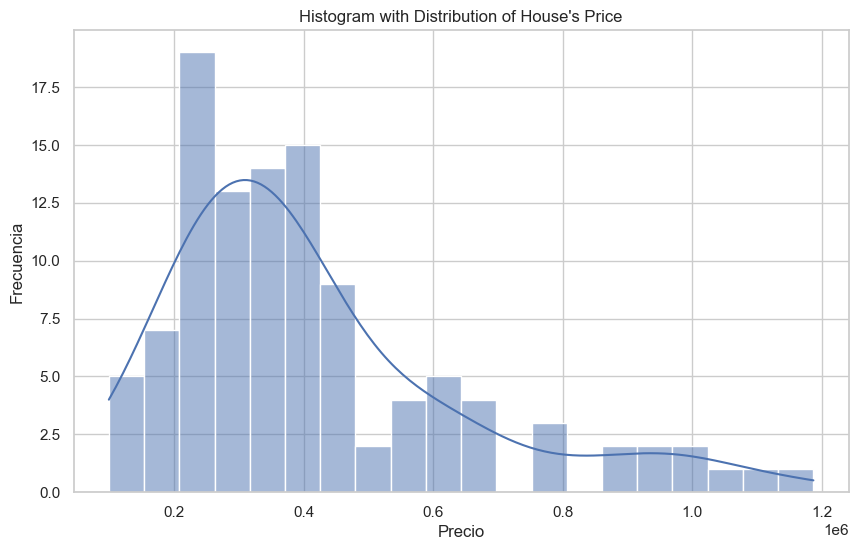

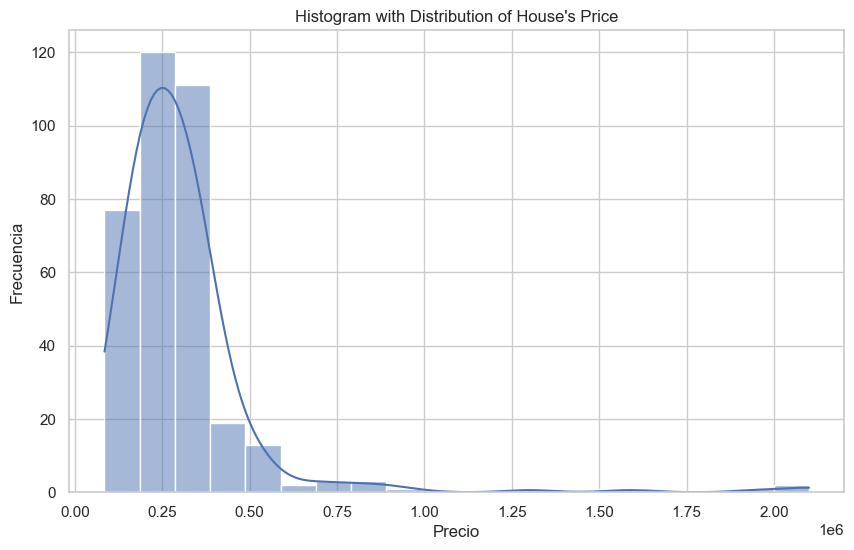

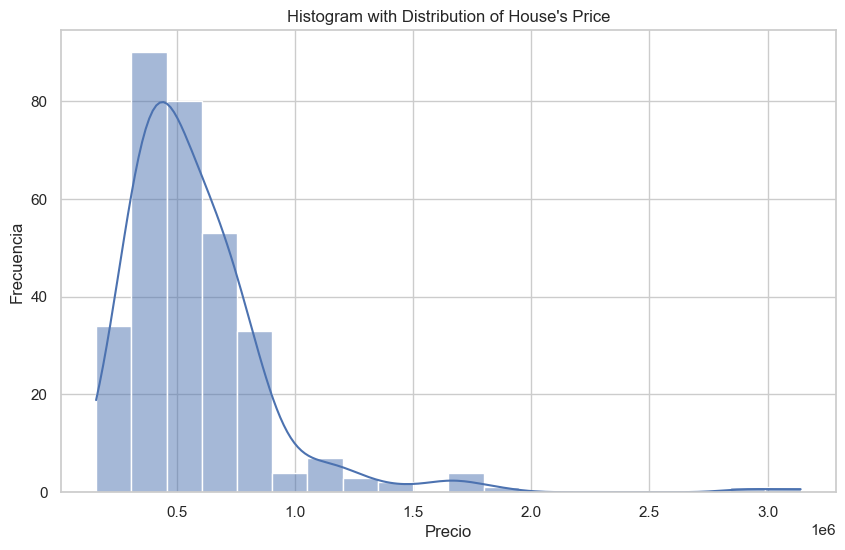

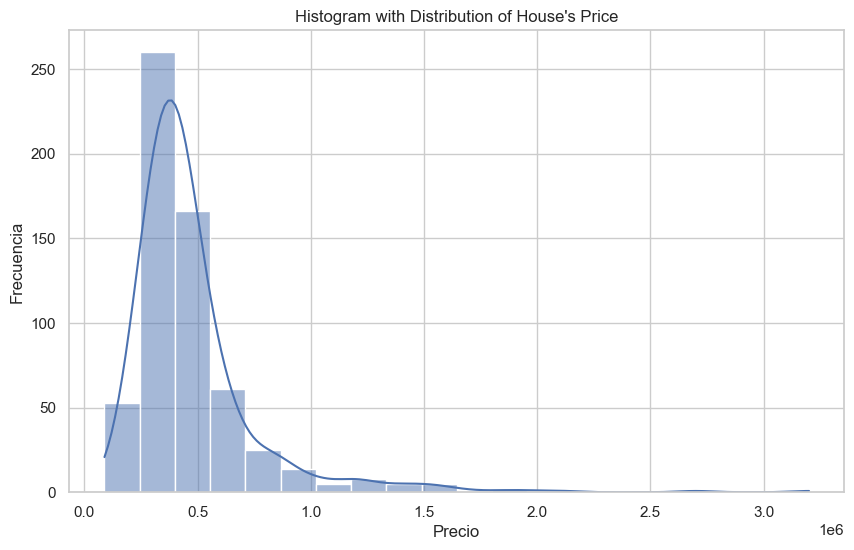

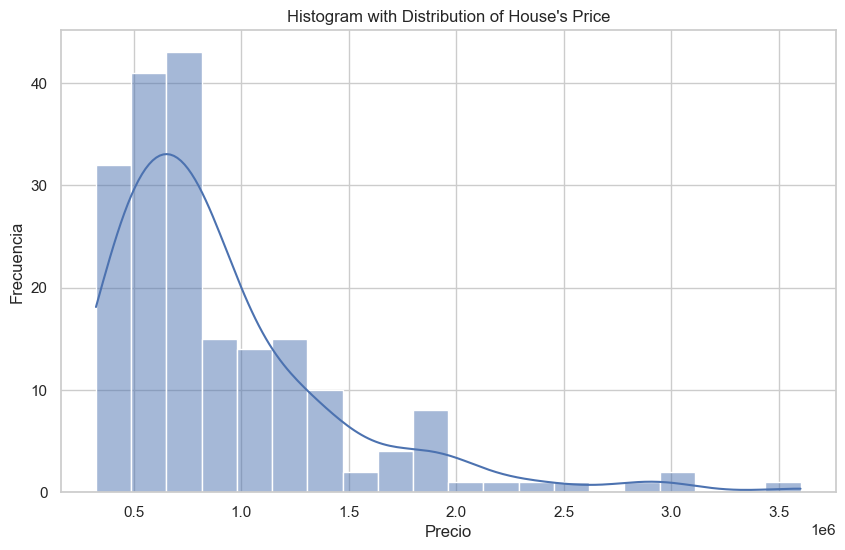

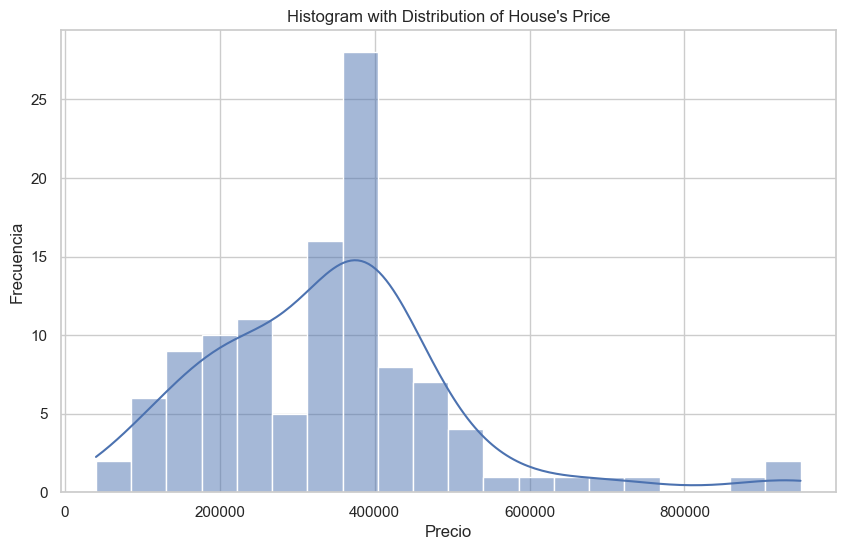

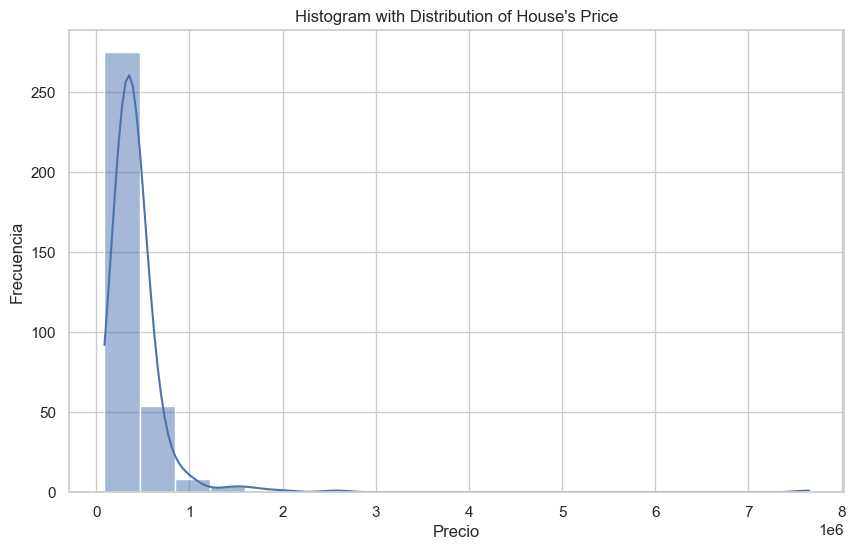

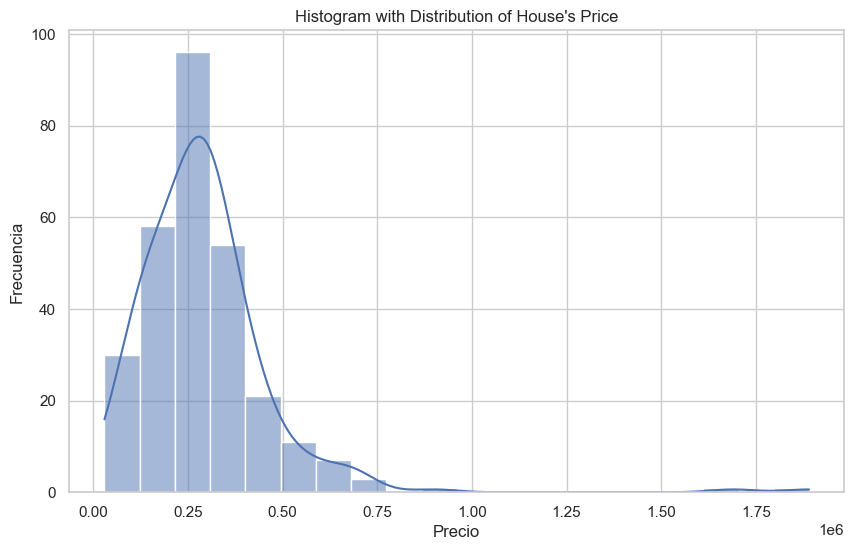

In [52]:
# House distributions before dealing with outliers

for prov in immo_H.Province.unique():
    region_price = immo_H[immo_H['Province'] == prov]['Price']
    sns.set(style="whitegrid")
        
    plt.figure(figsize=(10, 6))
    sns.histplot(region_price, bins=20, kde=True)
    

    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.title("Histogram with Distribution of House's Price")
    
    plt.show()  

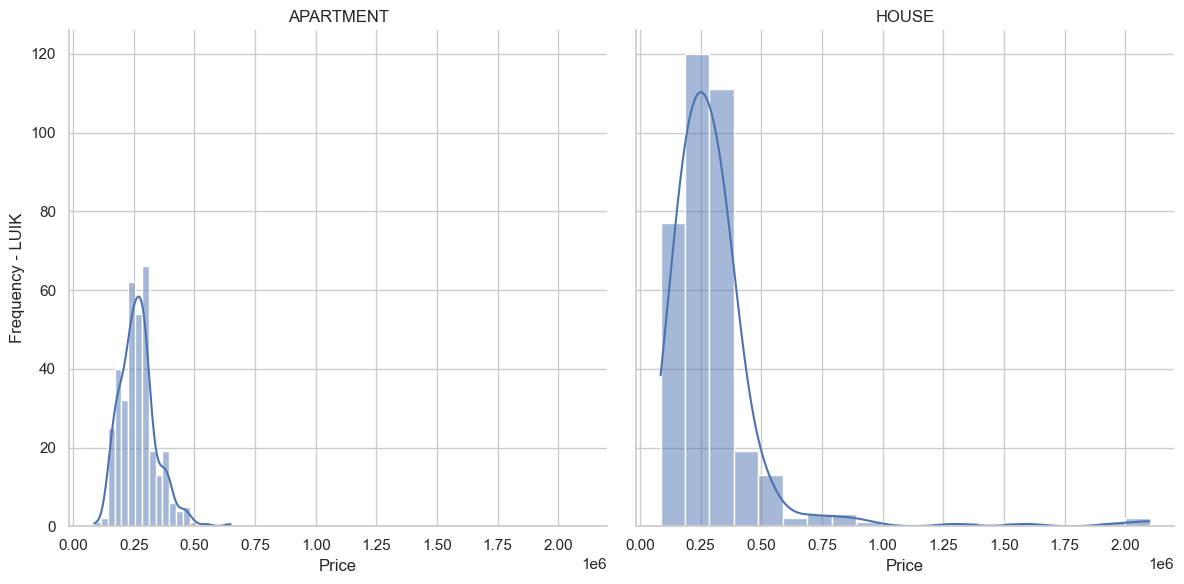

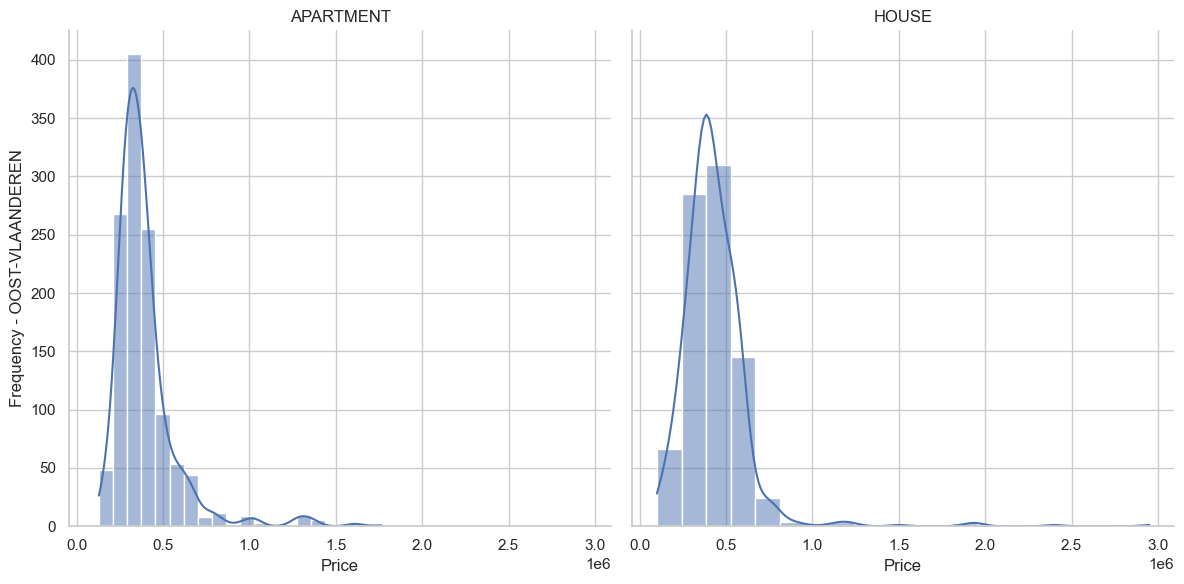

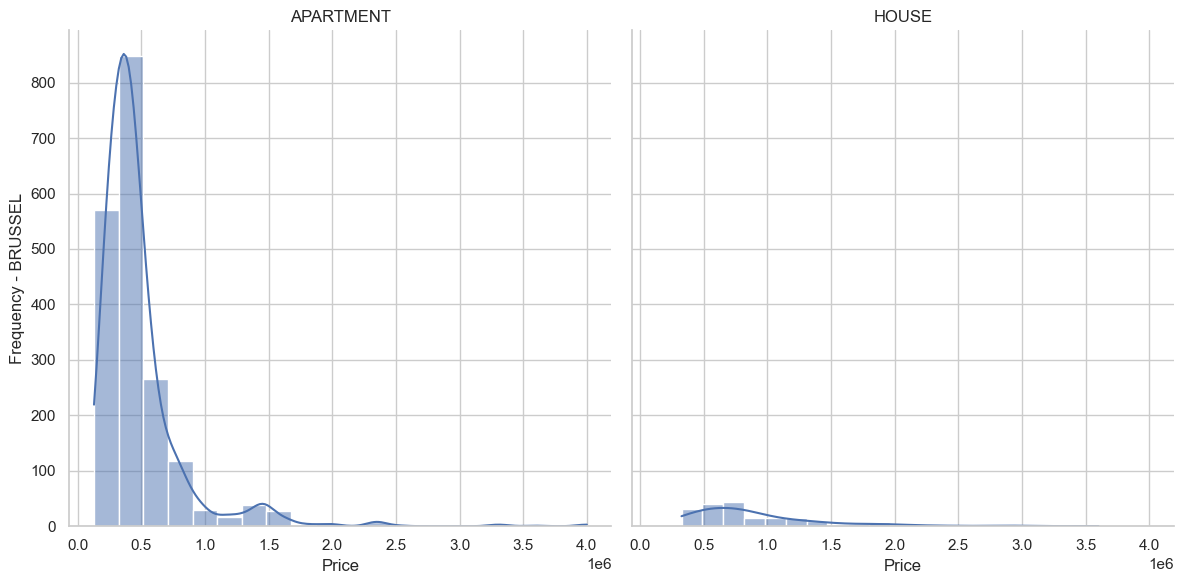

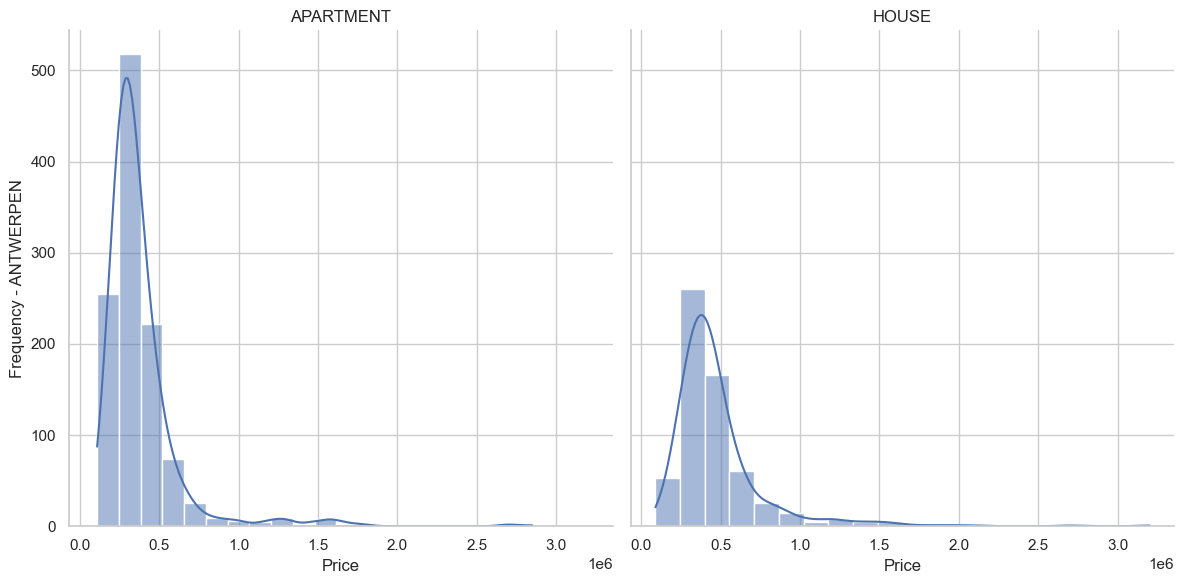

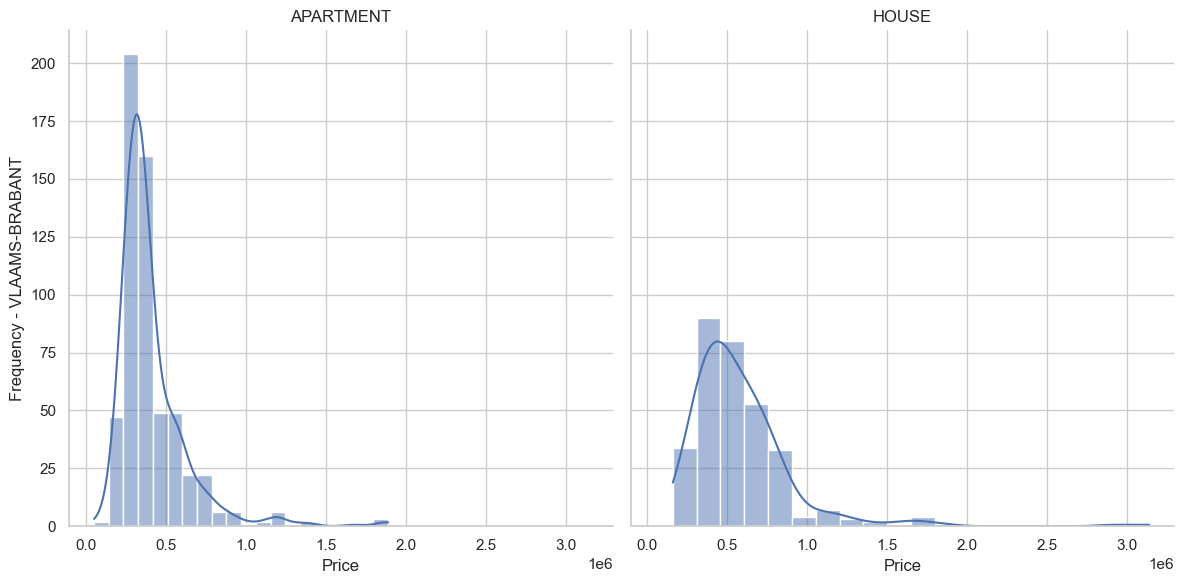

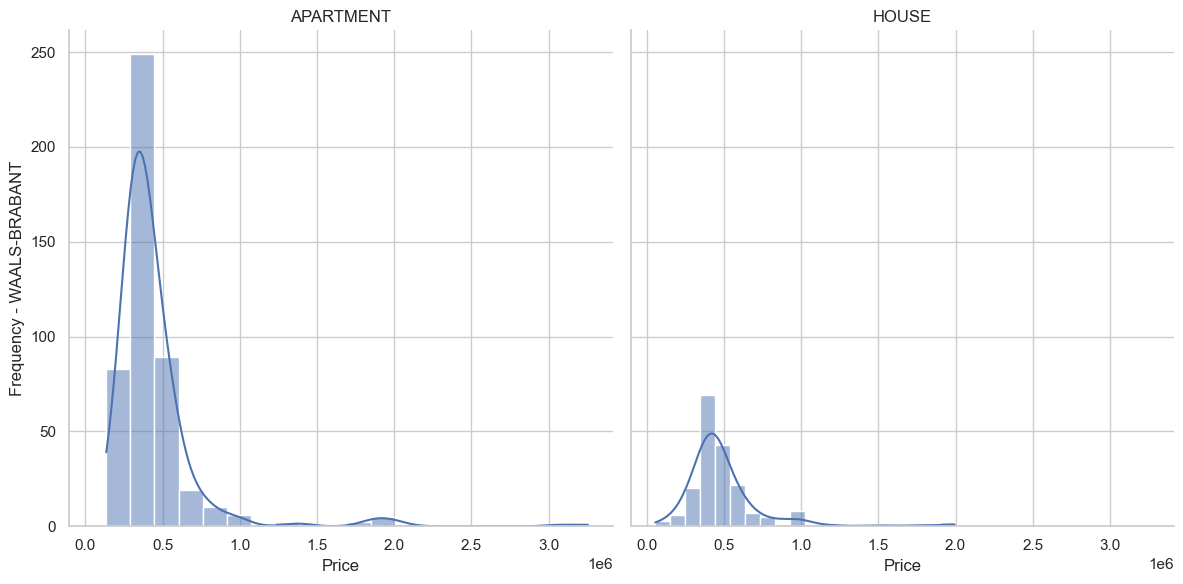

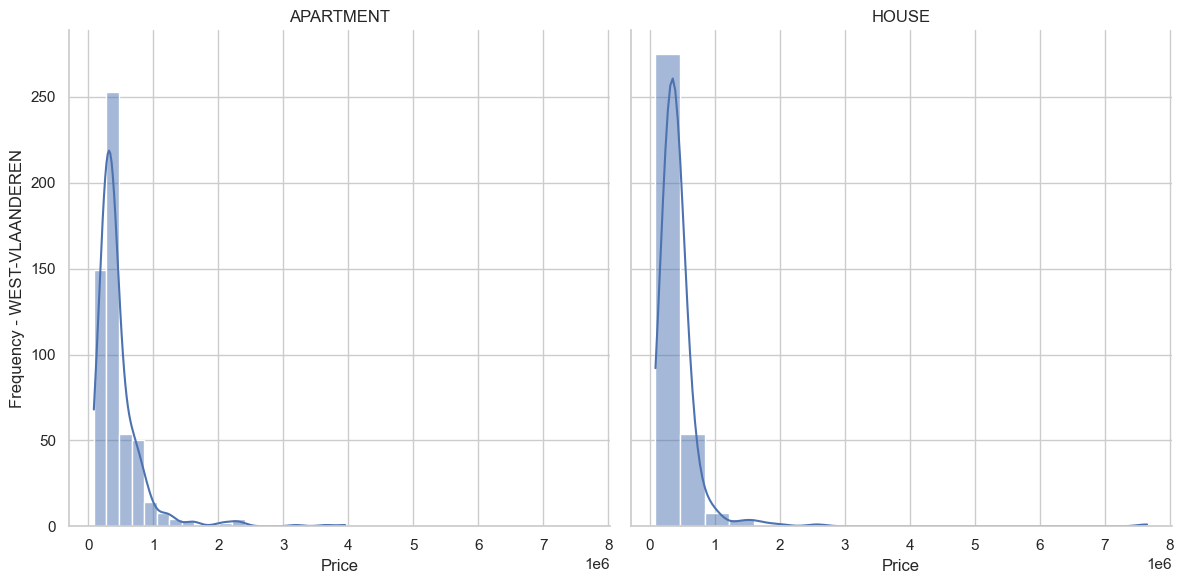

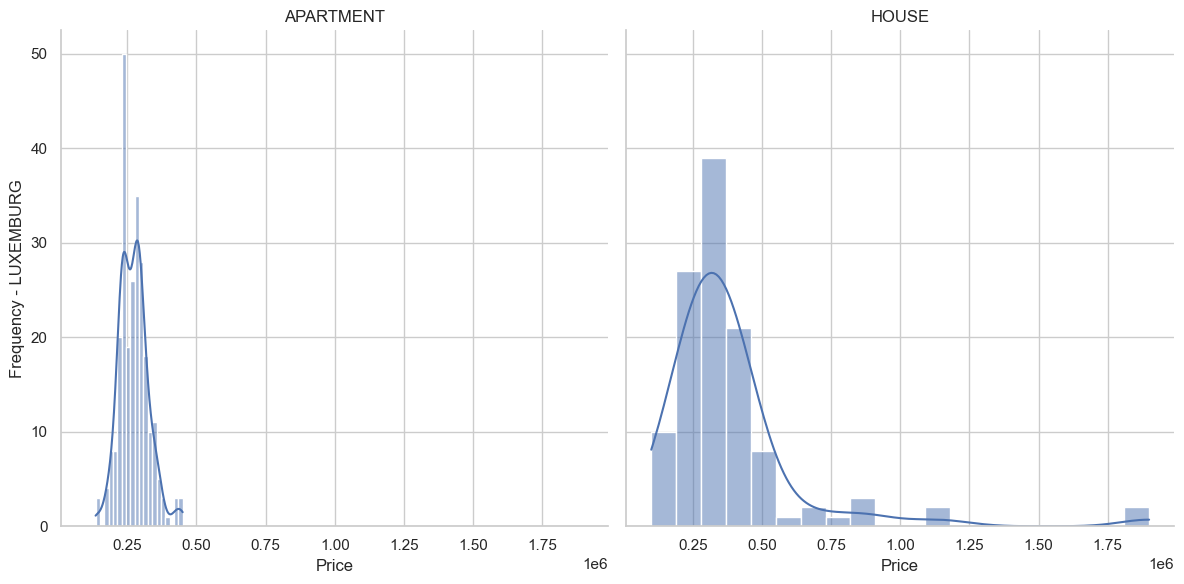

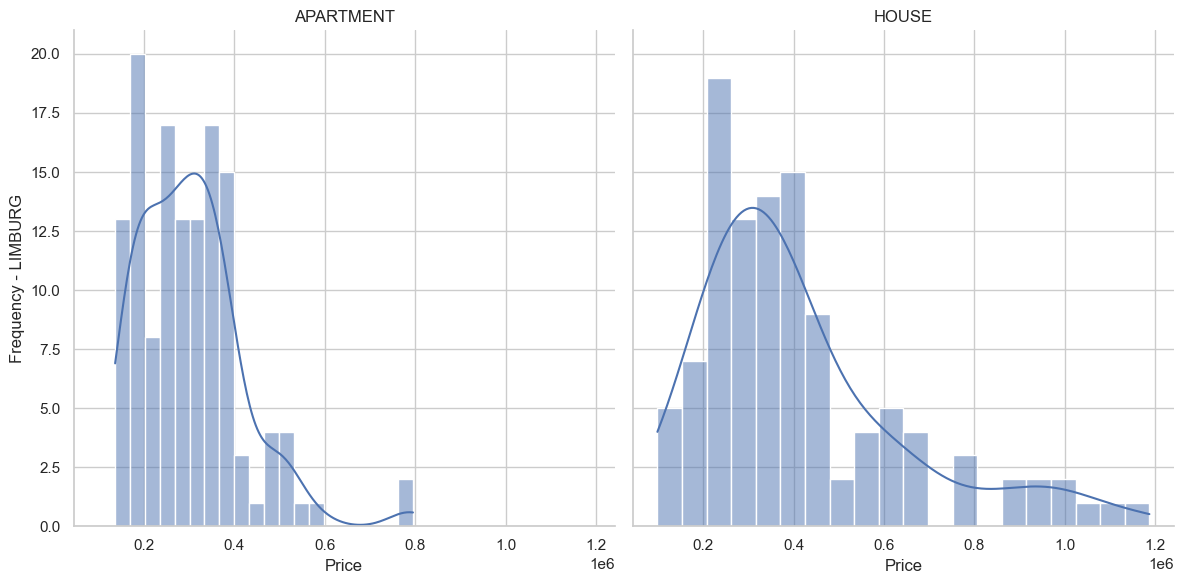

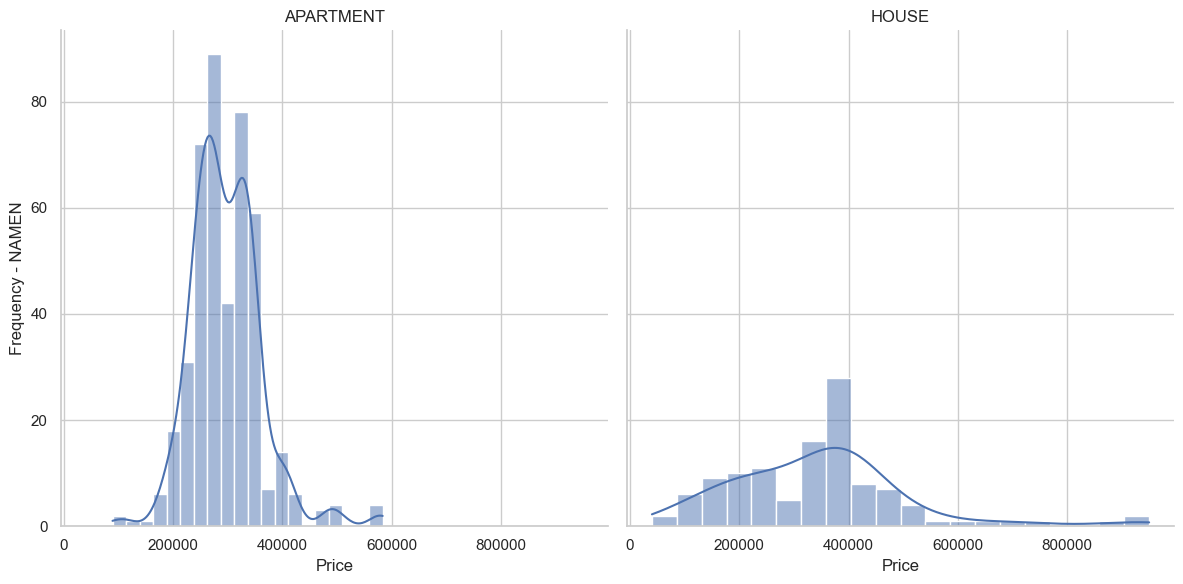

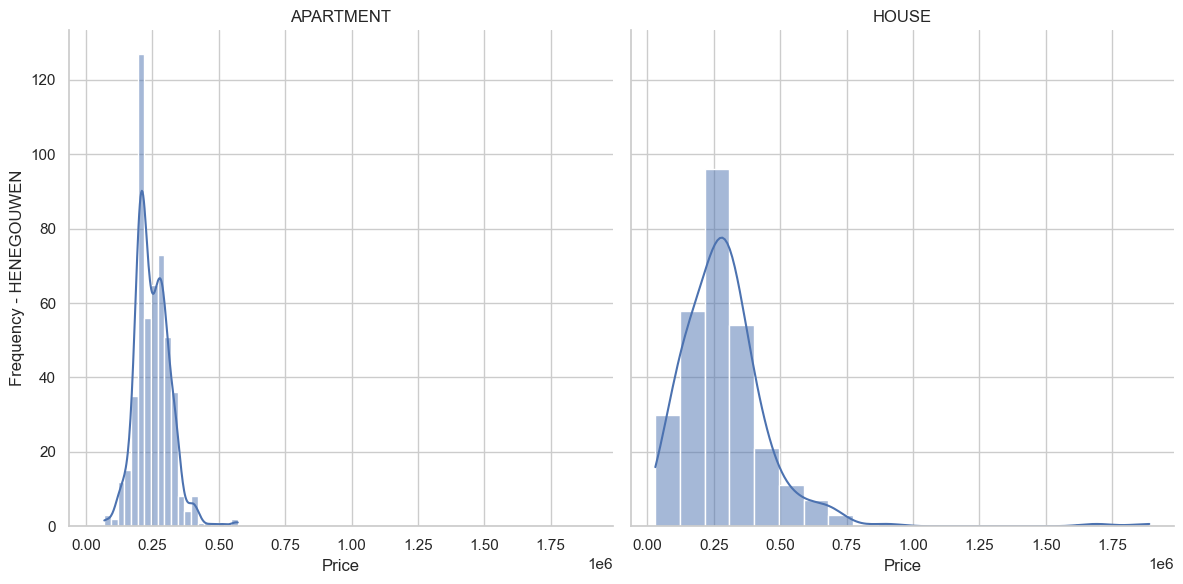

In [93]:
# House and apartments distribution before dealing with outliers 

for prov in immo_AP_H.Province.unique():
    region_price = immo_AP_H[immo_AP_H['Province'] == prov]

    sns.set(style="whitegrid")
    
    g = sns.FacetGrid(region_price, col="Type", col_order=["APARTMENT", "HOUSE"], height=6)
    
    g.map(sns.histplot, "Price", bins=20, kde=True)
    
    g.set_axis_labels("Price", "Frequency - " + prov)
    g.set_titles(col_template="{col_name}")
    
    
    plt.show()


### Outliers

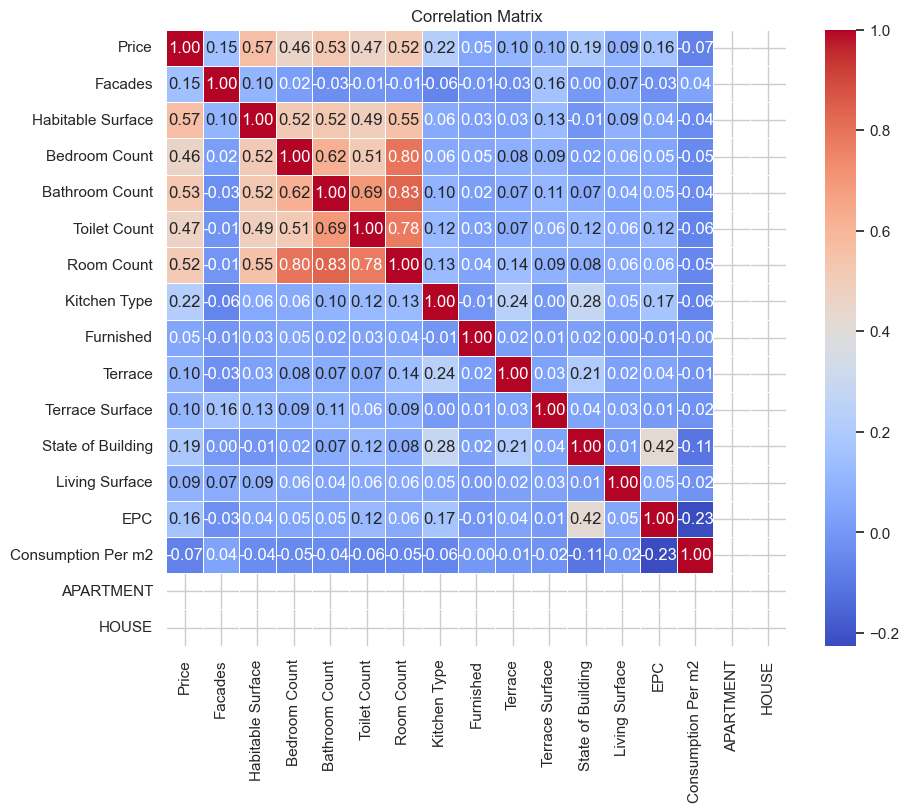

In [63]:
# Correlation matrix for houses before dealing with outliers

correlation_matrix = immo_H[immo_H.select_dtypes(include=['int', 'float']).columns].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

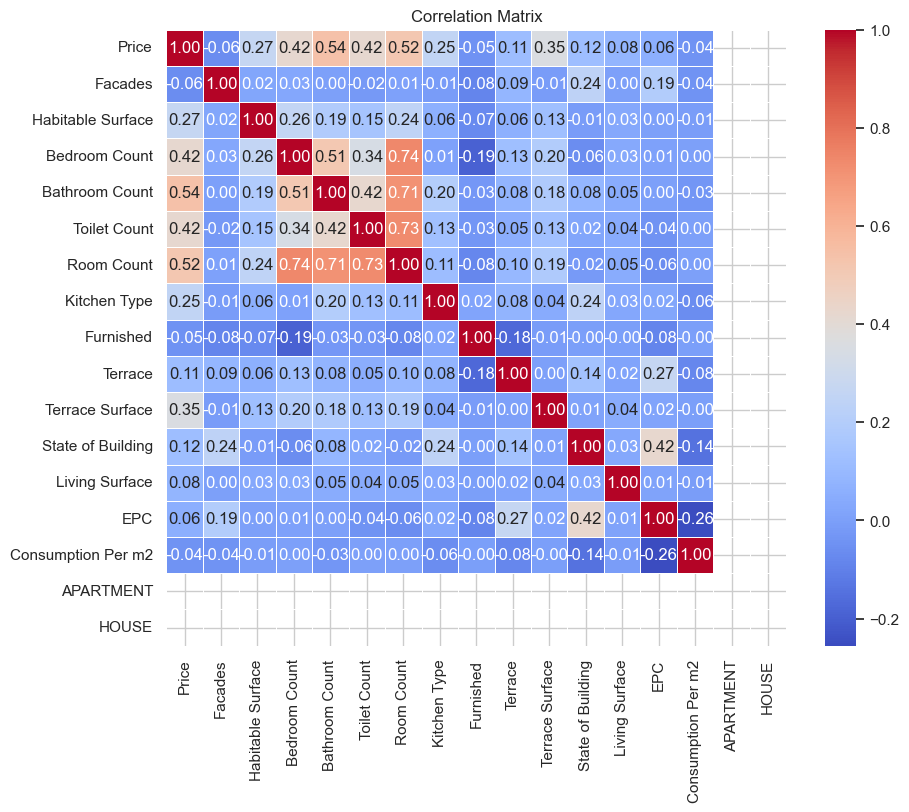

In [64]:
# Correlation matrix for apartments before dealing with outliers

correlation_matrix = immo_AP[immo_AP.select_dtypes(include=['int', 'float']).columns].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [61]:
# Calculating the interquartile range (IQR)
Q1 = immo_AP_H['Price'].quantile(0.25)
Q3 = immo_AP_H['Price'].quantile(0.75)
IQR = Q3 - Q1

# the limits to detect outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identify outliers
outliers = immo_AP_H[(immo_AP_H['Price'] < lower_limit) | (immo_AP_H['Price'] > upper_limit )]

# Calculates the number of values inside the IQR and the number of outliers.
values_inside_IQR = immo_AP_H[(immo_AP_H['Price'] >= lower_limit) & (immo_AP_H['Price'] <= upper_limit)].shape[0]
quantity_outliers = outliers.shape[0]

print(f"Price Null Count: {immo_AP_H['Price'].count()}")
print(f"Price mean: {immo_AP_H['Price'].mean()}")
print(f"Outliers Price mean: {outliers['Price'].mean()}")

outliers.shape

Price Null Count: 11043
Price mean: 414938.3053518066
Outliers Price mean: 1194050.4264339153


(802, 20)

In [55]:
def remove_outliers_by_province(df, col_name, province_col):
    df_clean = pd.DataFrame()  
    for province, group in df.groupby(province_col):
        Q1 = group[col_name].quantile(0.25)  
        Q3 = group[col_name].quantile(0.75)  
        IQR = Q3 - Q1  
        lower_bound = Q1 - 1.5 * IQR 
        upper_bound = Q3 + 1.5 * IQR  
        outliers_removed = group[(group[col_name] >= lower_bound) & (group[col_name] <= upper_bound)]
        df_clean = pd.concat([df_clean, outliers_removed]) 
    return df_clean


df_H_clean = remove_outliers_by_province(immo_H, 'Price', 'Province')
df_AP_clean = remove_outliers_by_province(immo_AP, 'Price', 'Province')

In [92]:
# Save houses and apartments without outliers

df_H_clean.to_csv('../data/cleaned/immo_house_not_outliers.csv', index=False)

df_AP_clean.to_csv('../data/cleaned/immo_apartment_not_outliers.csv', index=False)

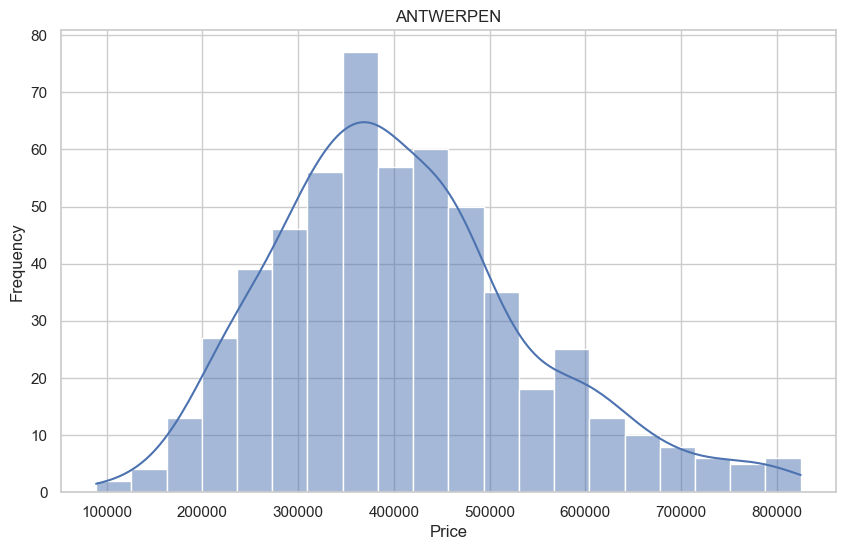

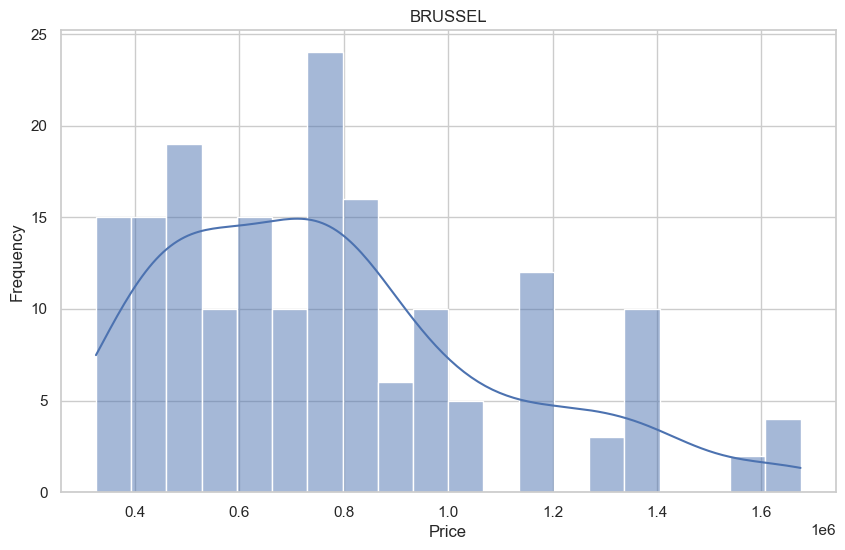

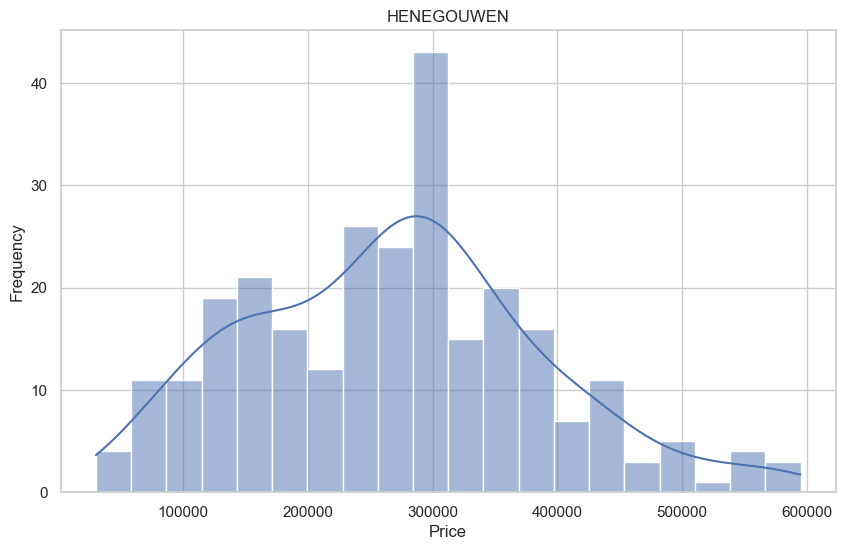

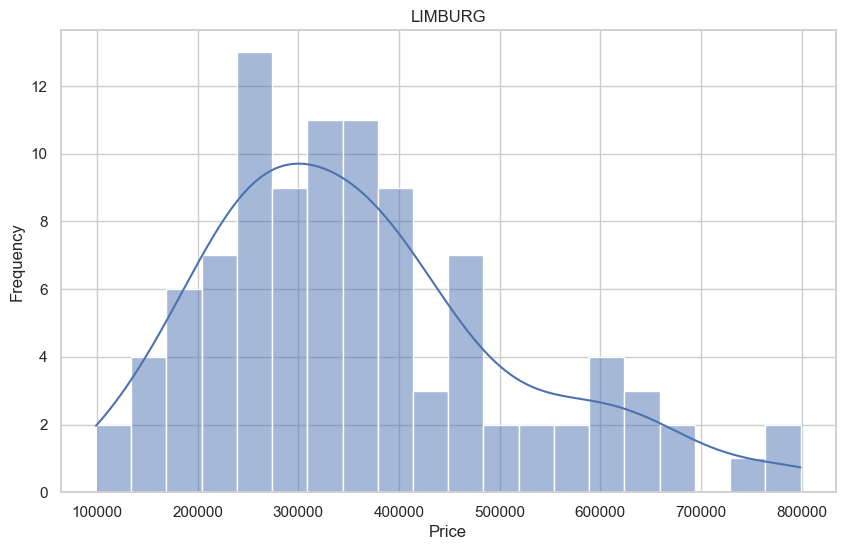

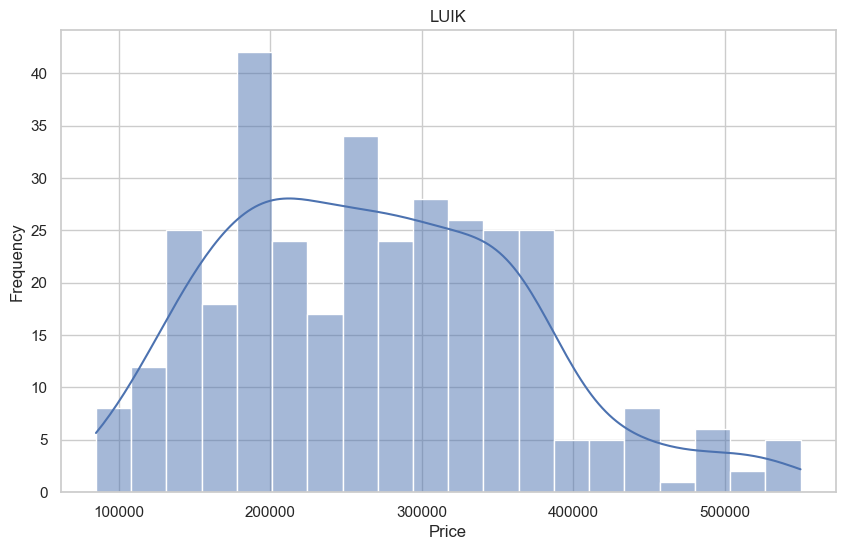

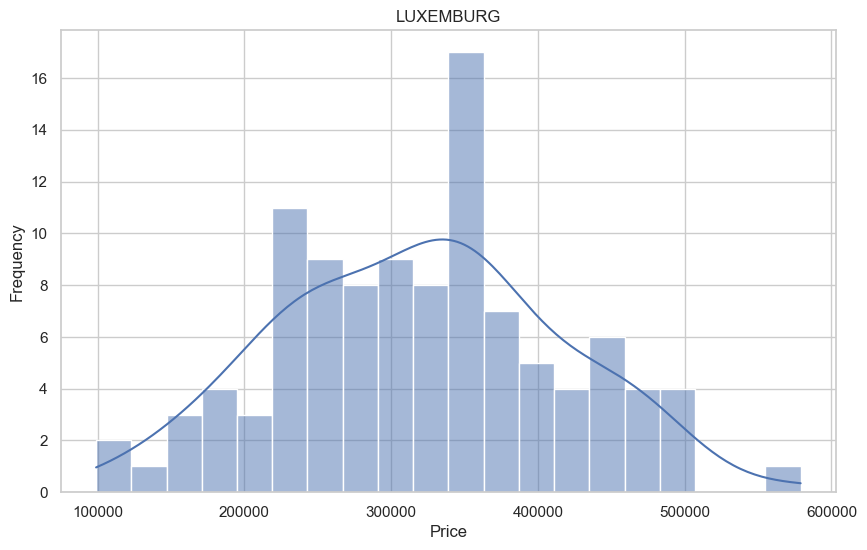

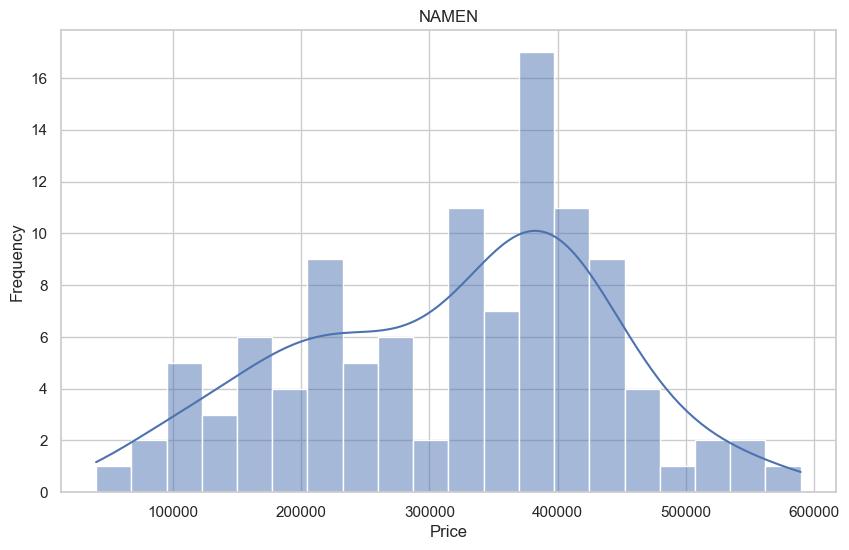

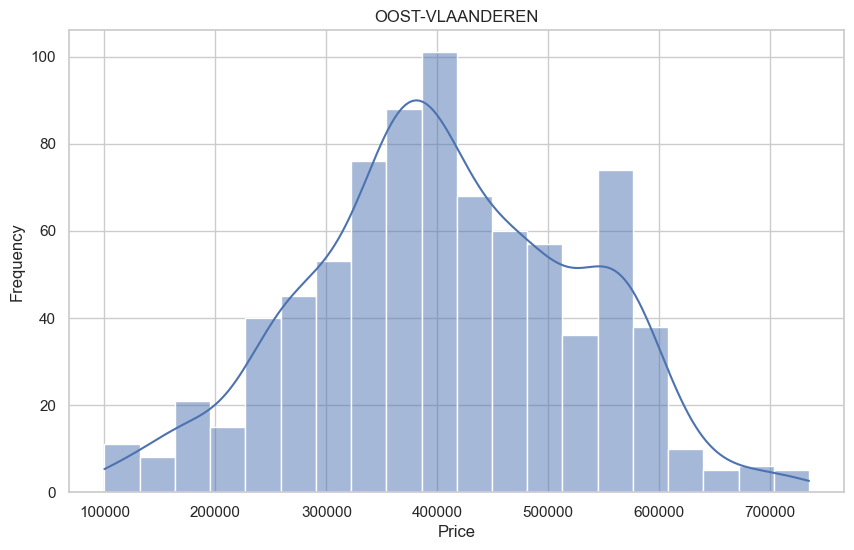

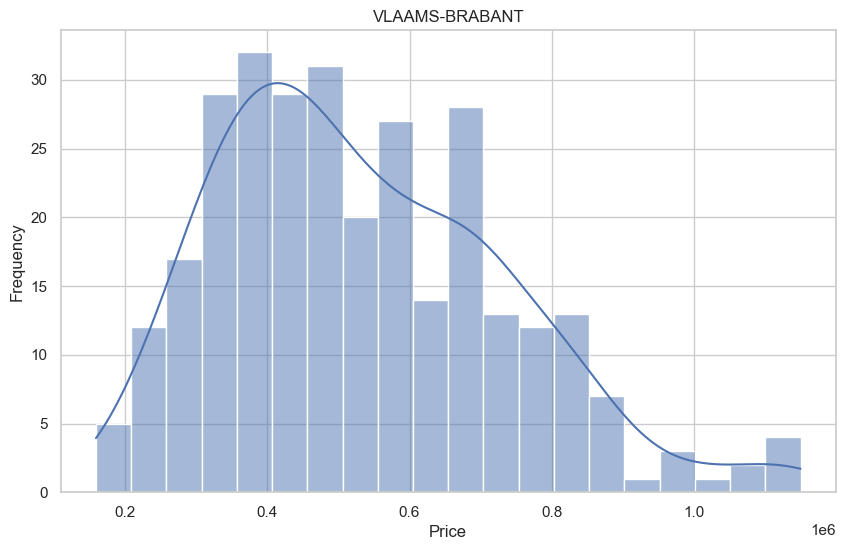

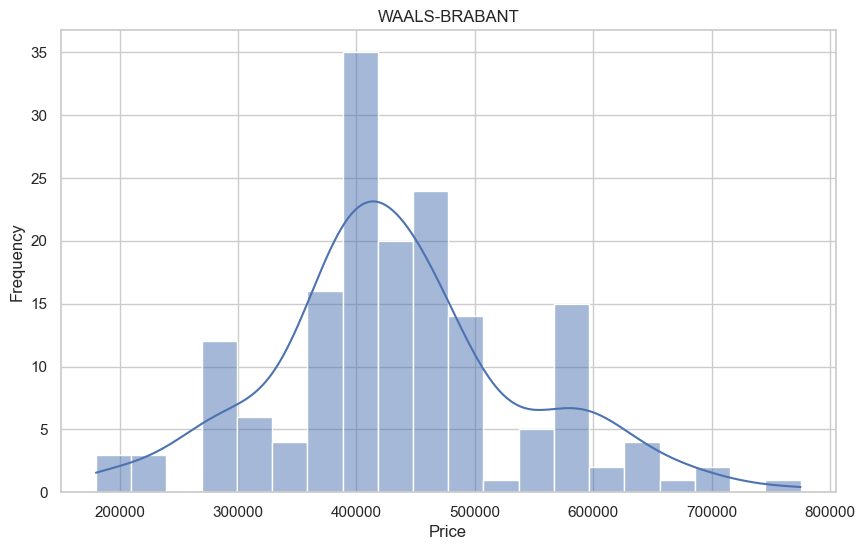

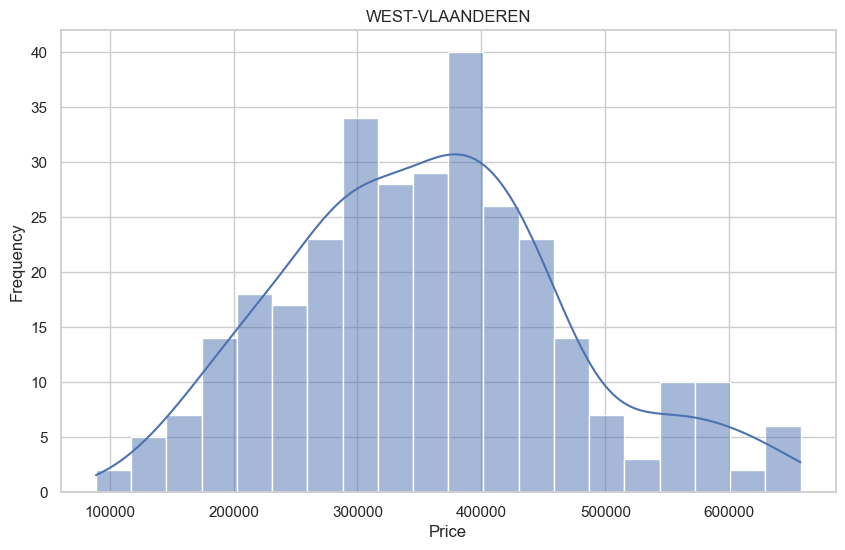

In [71]:
# House distribution by region after dealing with outliers

for prov in df_H_clean.Province.unique():
    region_price = df_H_clean[df_H_clean['Province'] == prov]['Price']
    sns.set(style="whitegrid")
        
    plt.figure(figsize=(10, 6))
    sns.histplot(region_price, bins=20, kde=True)
    
    
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.title(prov)
    
    plt.show()  

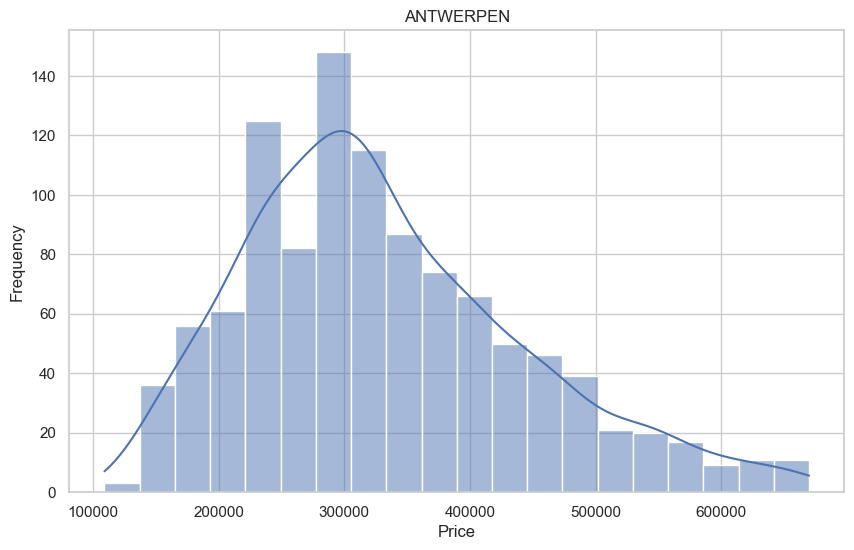

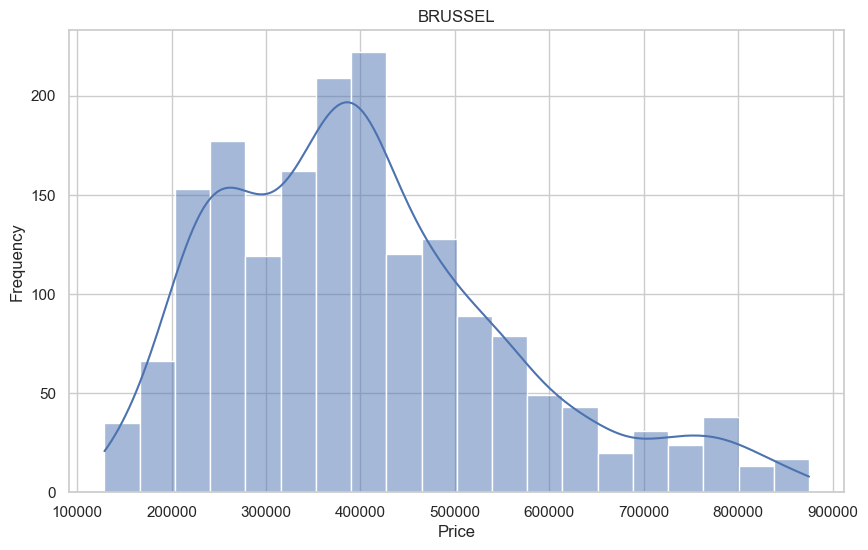

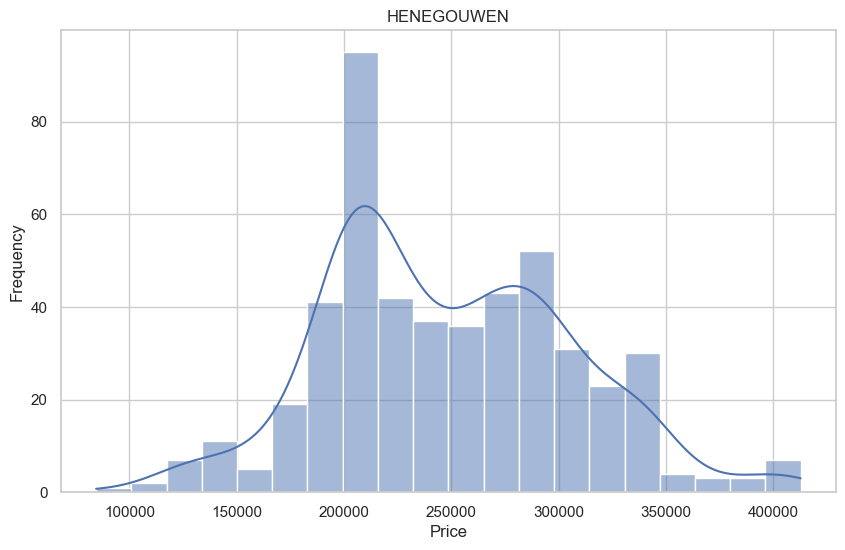

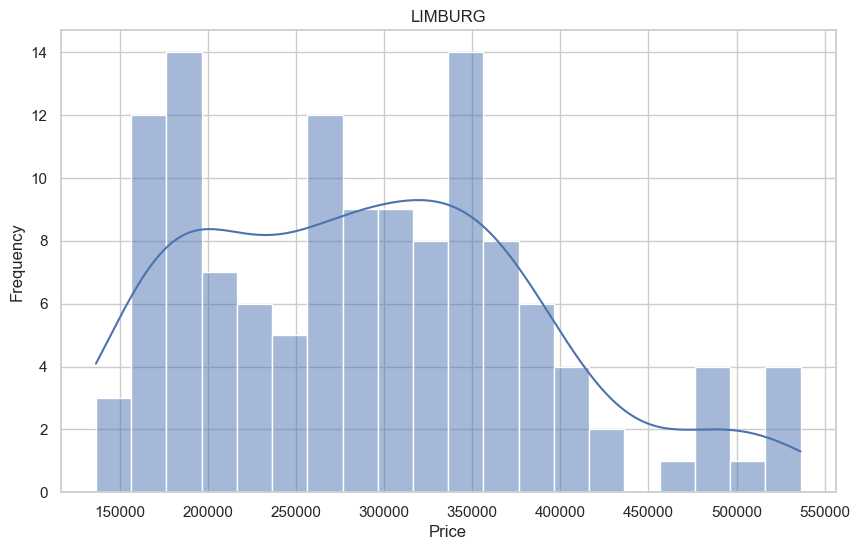

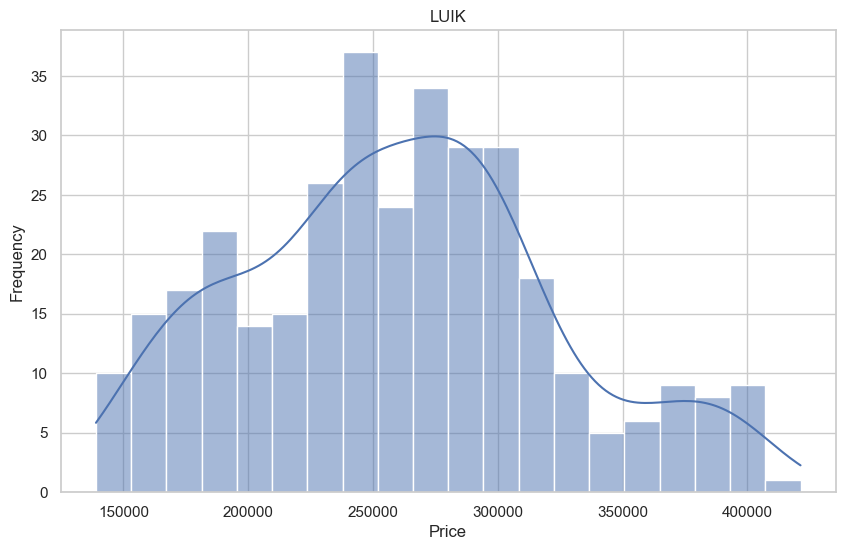

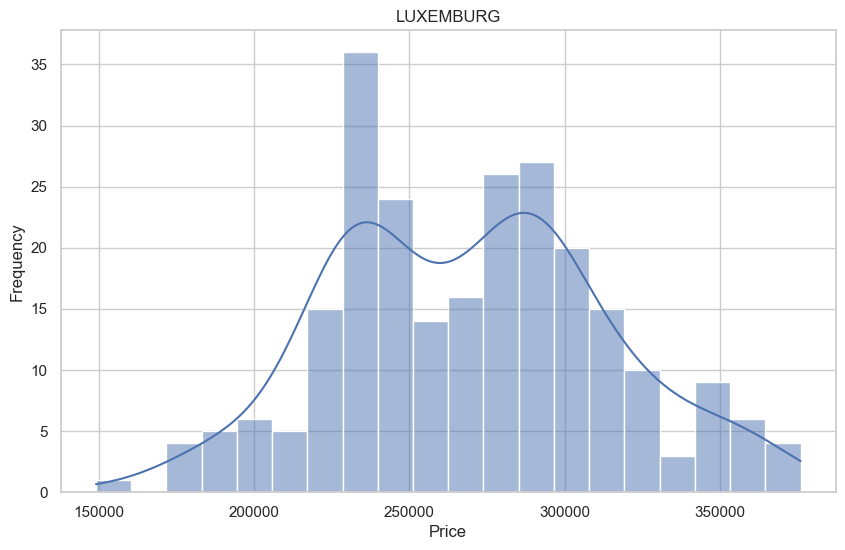

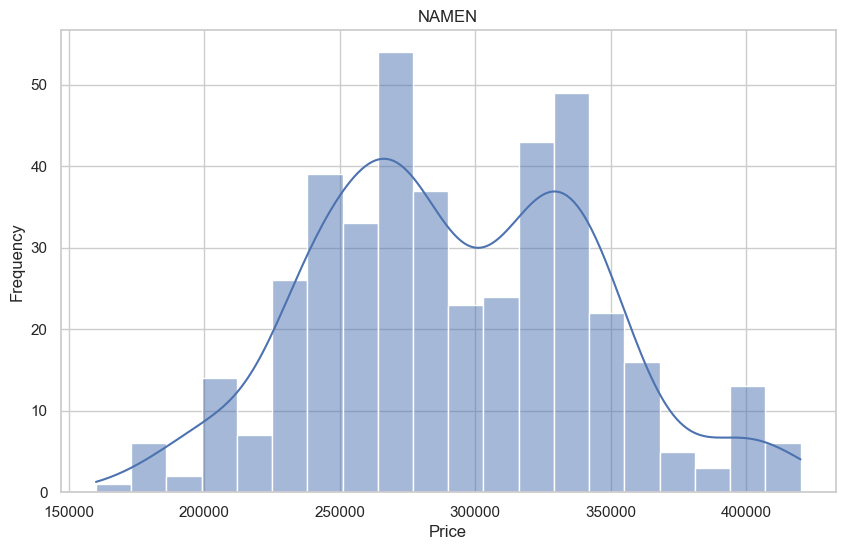

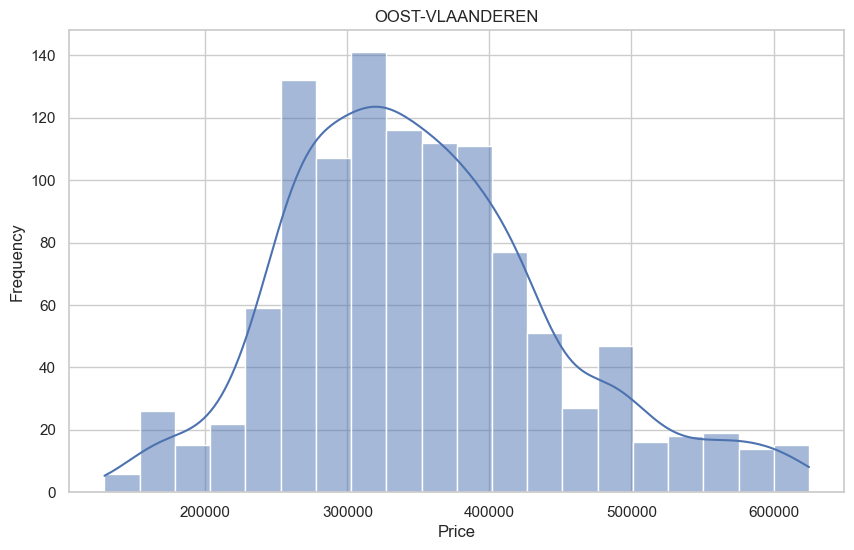

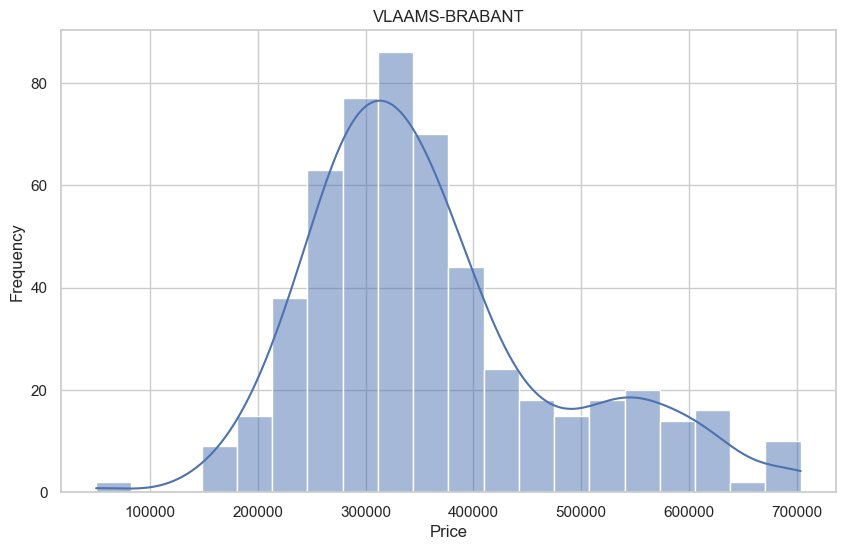

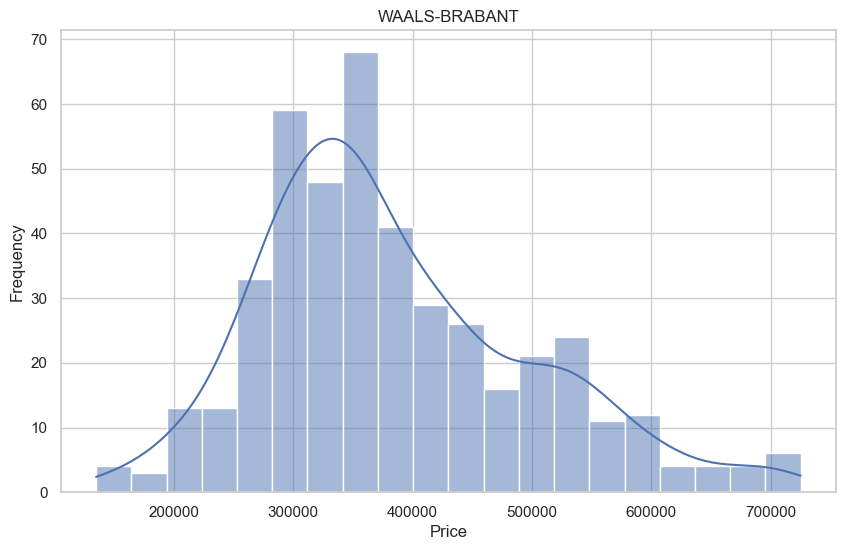

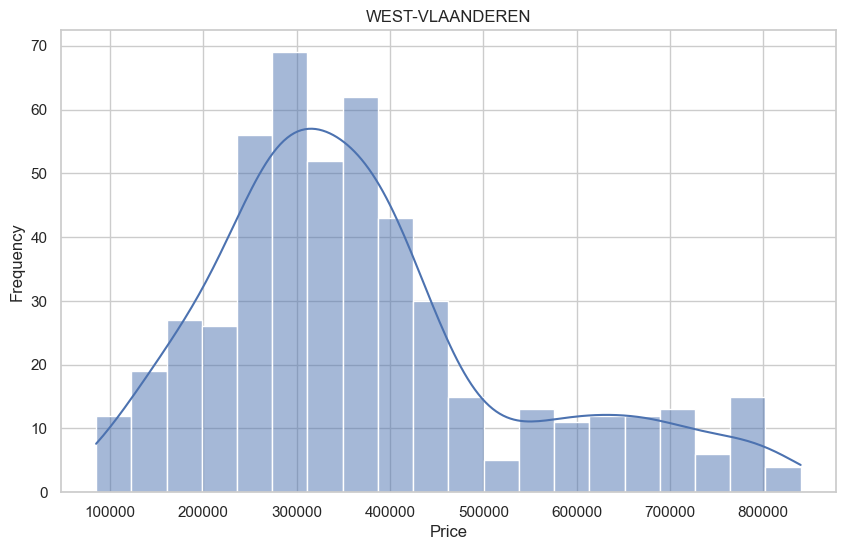

In [72]:
# Apartment's distribution by region after dealing with outliers
    
for prov in df_AP_clean.Province.unique():
    region_price = df_AP_clean[df_AP_clean['Province'] == prov]['Price']
    sns.set(style="whitegrid")
        
    plt.figure(figsize=(10, 6))
    sns.histplot(region_price, bins=20, kde=True)
    
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.title(prov)
    
    plt.show()  

### As shown by the data, we are in the presence of a binomial distribution

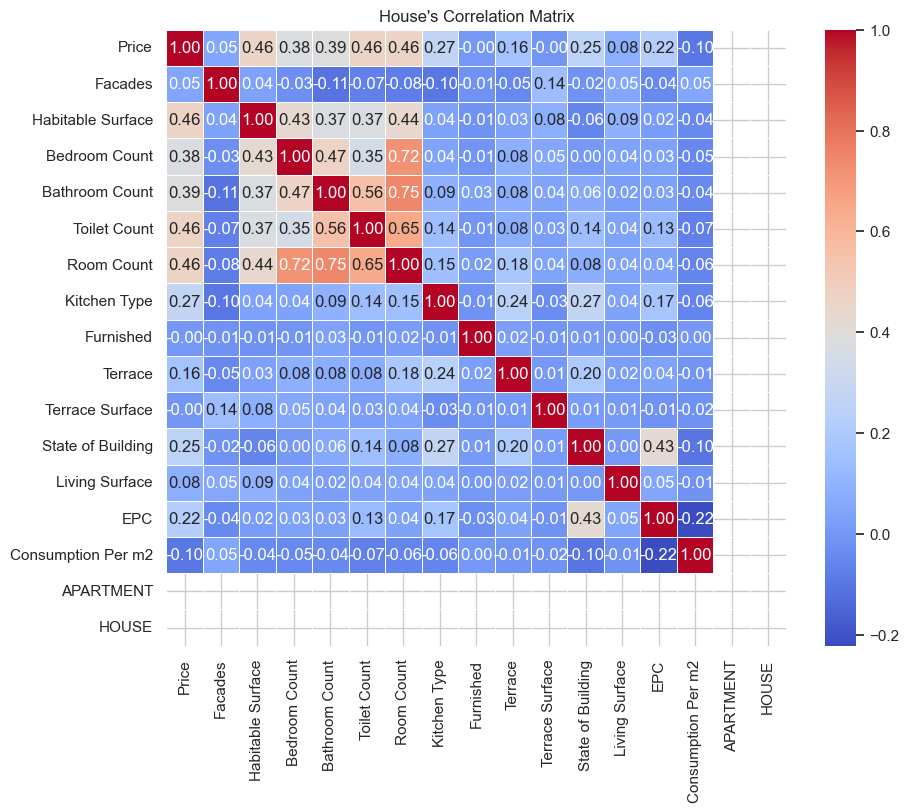

In [81]:
# Correlation matrix for houses after dealing with outliers

correlation_matrix = df_H_clean[df_H_clean.select_dtypes(include=['int', 'float']).columns].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("House's Correlation Matrix")
plt.show()

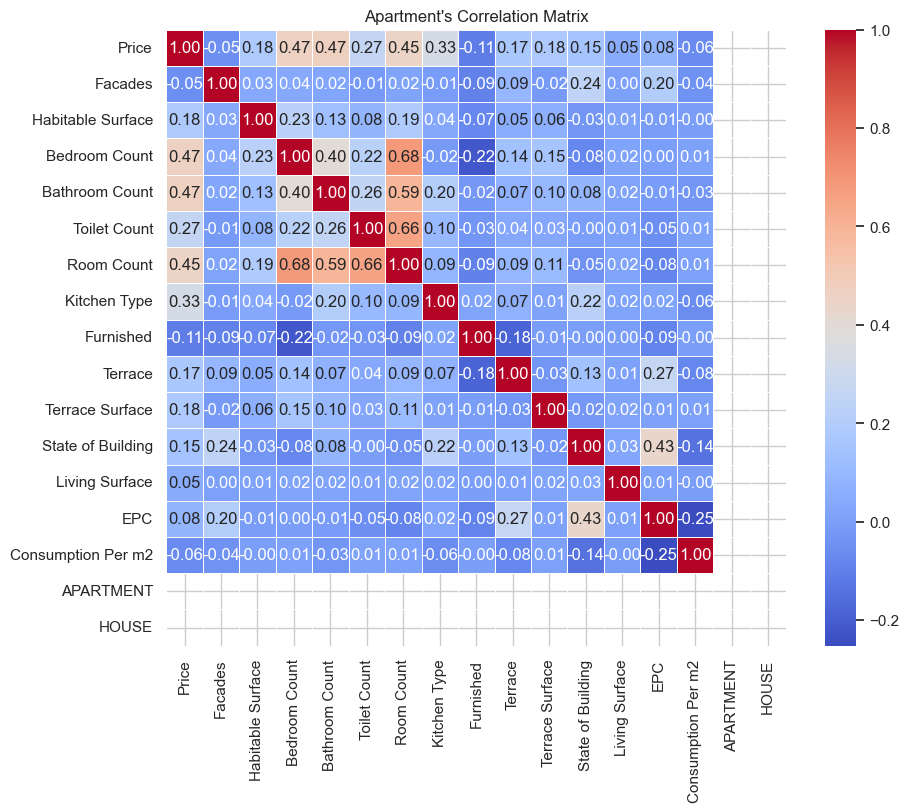

In [82]:
# Correlation matrix for apartments after dealing with outliers

correlation_matrix = df_AP_clean[df_AP_clean.select_dtypes(include=['int', 'float']).columns].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Apartment's Correlation Matrix")
plt.show()

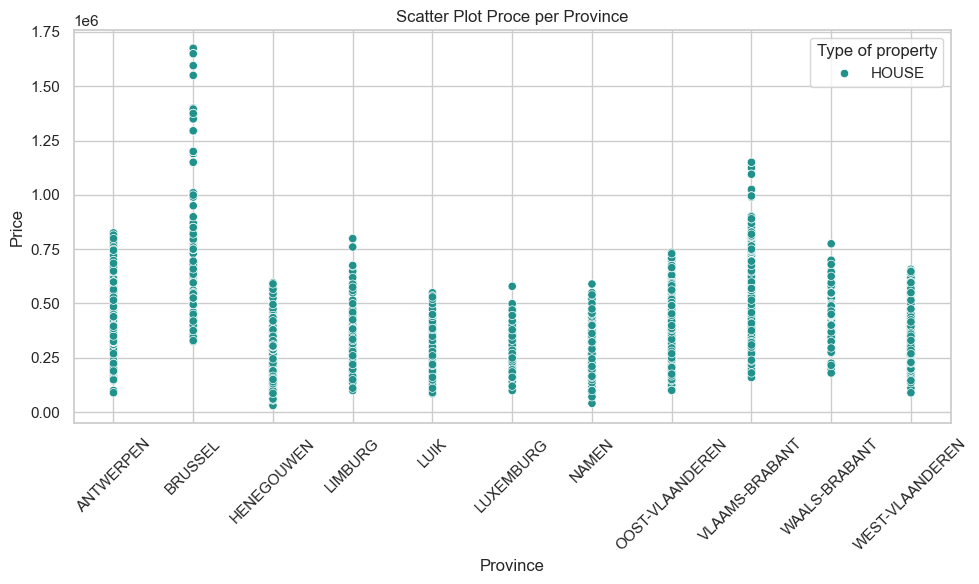

In [73]:
sns.set(style="whitegrid")

# Crear el scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_H_clean, x='Province', y='Price', hue='Type', palette='viridis')
plt.xlabel('Province')
plt.ylabel('Price')
plt.title('Scatter Plot Proce per Province')
plt.xticks(rotation=45)
plt.legend(title='Type of property')
plt.tight_layout() 
plt.show()

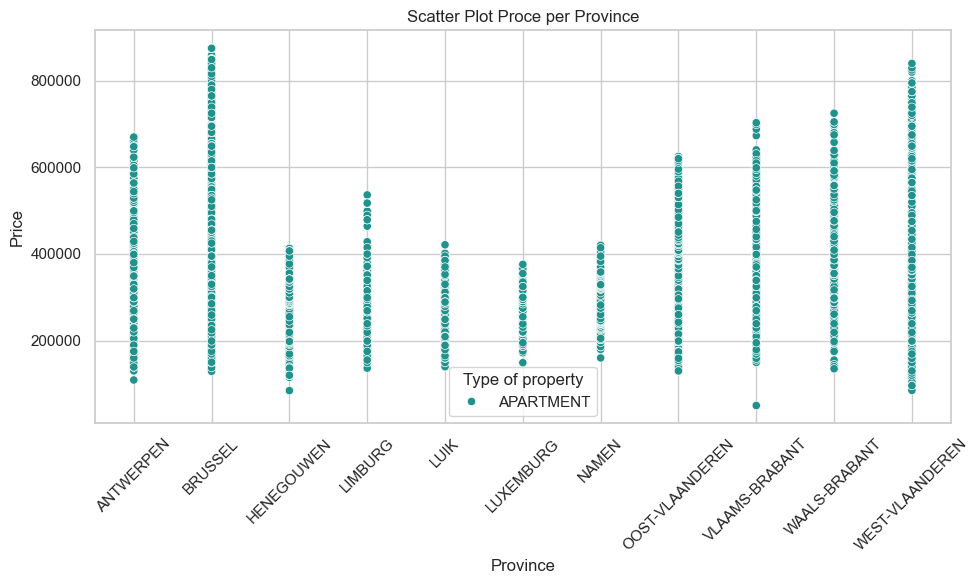

In [75]:
sns.set(style="whitegrid")

# Crear el scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_AP_clean, x='Province', y='Price', hue='Type', palette='viridis')
plt.xlabel('Province')
plt.ylabel('Price')
plt.title('Scatter Plot Proce per Province')
plt.xticks(rotation=45)
plt.legend(title='Type of property')
plt.tight_layout() 
plt.show()

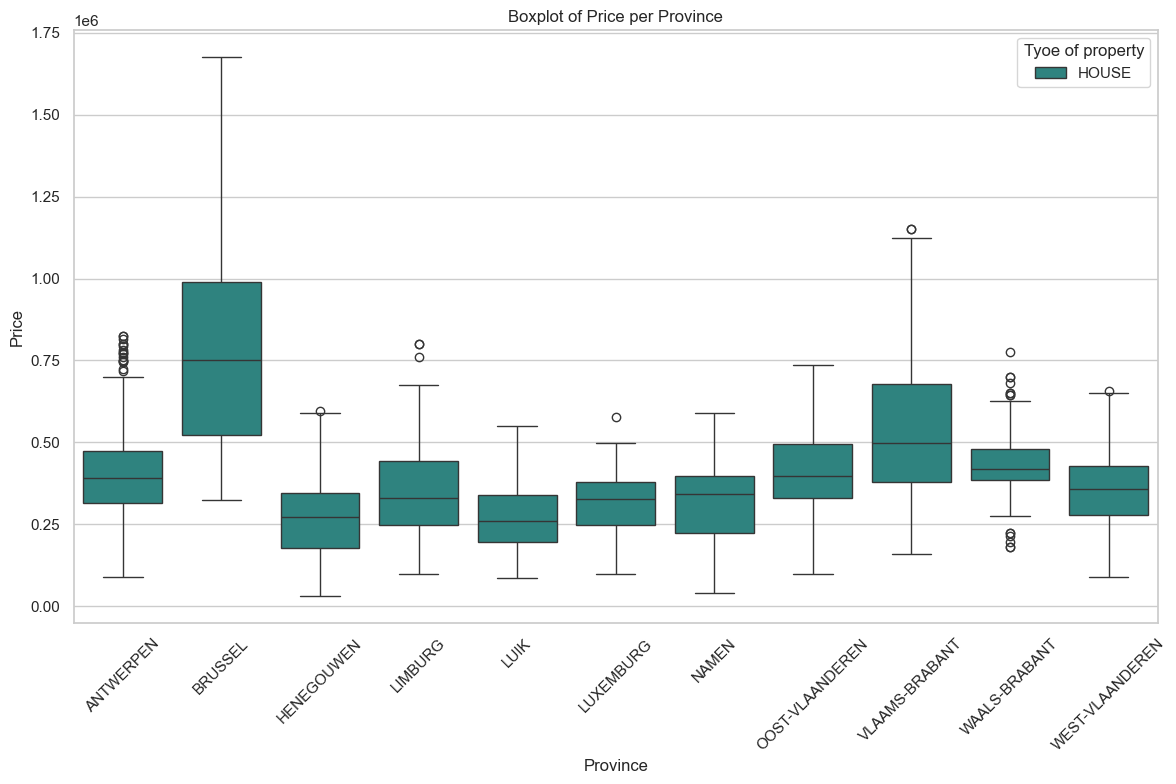

In [77]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_H_clean, x='Province', y='Price', hue='Type', palette='viridis')
plt.xlabel('Province')
plt.ylabel('Price')
plt.title('Boxplot of Price per Province')
plt.xticks(rotation=45)
plt.legend(title='Tyoe of property')
plt.tight_layout() 
plt.show()

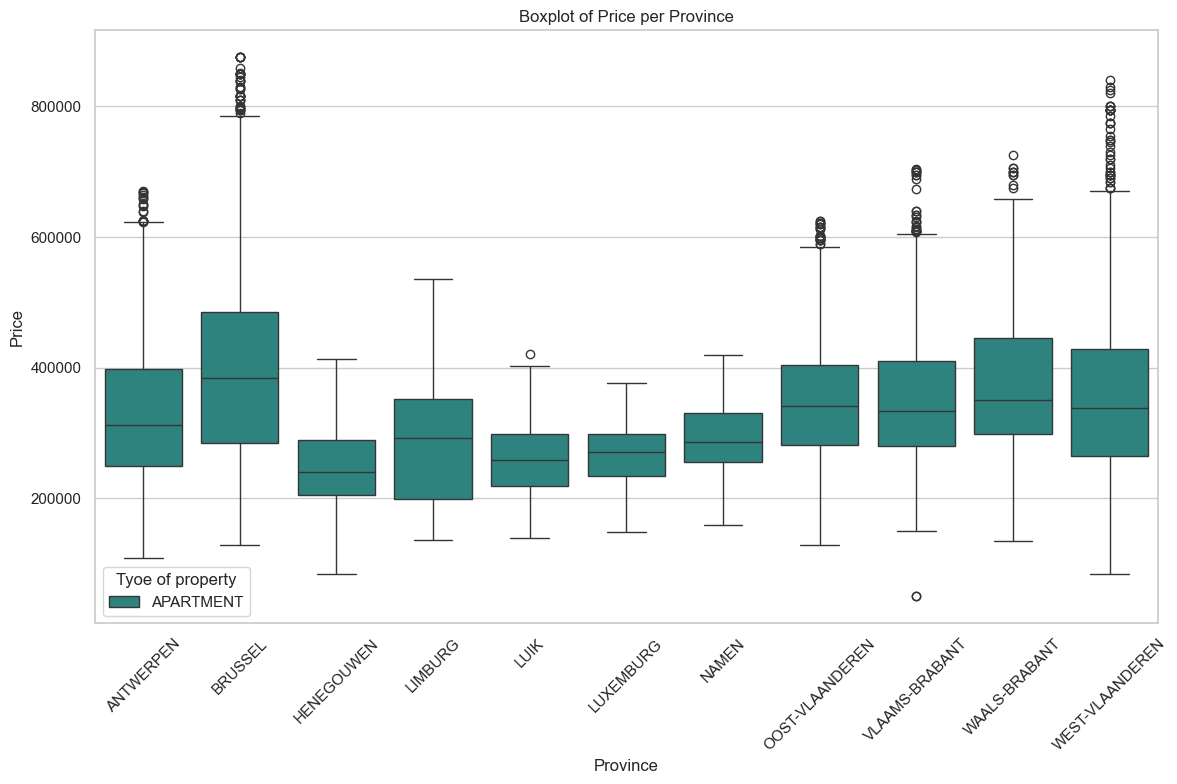

In [78]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_AP_clean, x='Province', y='Price', hue='Type', palette='viridis')
plt.xlabel('Province')
plt.ylabel('Price')
plt.title('Boxplot of Price per Province')
plt.xticks(rotation=45)
plt.legend(title='Tyoe of property')
plt.tight_layout() 
plt.show()

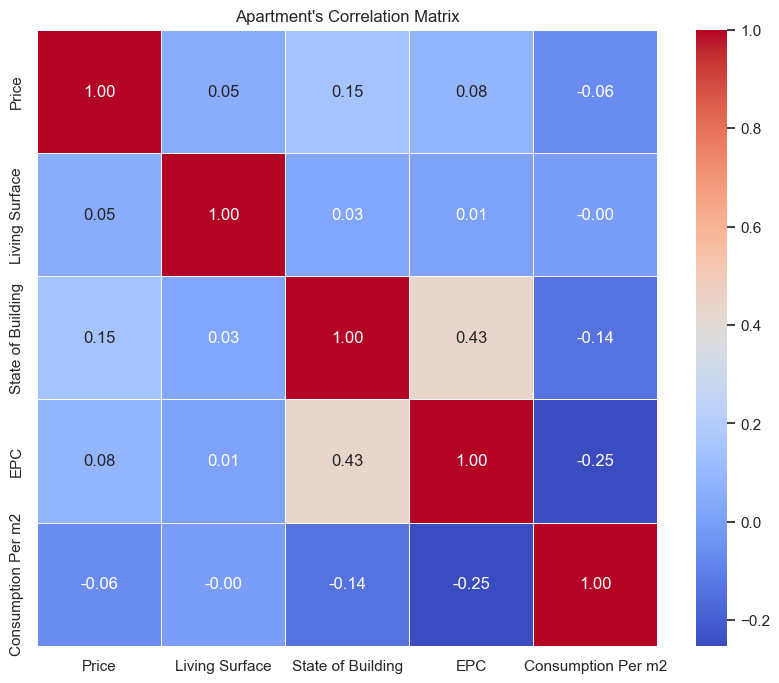

In [90]:
correlation_matrix = df_AP_clean[['Price', 'Living Surface', 'State of Building','EPC', 'Consumption Per m2']].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Apartment's Correlation Matrix")
plt.show()  